# Heart Disease Prediction Project
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade


## Project Overview
This project aims to build a highly accurate, interpretable, and clinically robust machine learning system to predict heart disease. The system leverages multiple datasets comprising clinical, lifestyle, and demographic information from patients, with the goal of providing actionable insights to healthcare professionals.

## Datasets
We are integrating three main datasets:
1. **Classic Heart Disease Dataset (Cleveland, Hungary, Switzerland, Long Beach V)**  
   - 76 attributes (focus on 14 key features) including age, sex, chest pain type, resting blood pressure, cholesterol, maximum heart rate, and more.
2. **Patient Lifestyle and Clinical Dataset**  
   - Features include age, gender, blood pressure, cholesterol, exercise habits, smoking status, diabetes status, BMI, and family history of heart disease.
3. **Synthetic Clinical & Lifestyle Dataset**  
   - Comprehensive set of features combining clinical measurements and lifestyle attributes; includes categorical and continuous variables for robust modeling.

## Project Methodology

### 1. Data Ingestion & Profiling
- Load all datasets and create a reproducible data repository.
- Generate summary statistics and data profiles (missing values, distributions, outliers).

### 2. Data Cleaning & Harmonization
- Standardize feature names, units, and categorical encodings.
- Map equivalent fields across datasets.
- Handle missing values using imputation strategies appropriate for each feature type.

### 3. Exploratory Data Analysis (EDA)
- Analyze distributions of variables and relationships between features and target.
- Identify outliers and unusual patterns.
- Examine class balance for the target variable.

### 4. Feature Engineering
- Transform categorical features to meaningful formats.
- Normalize continuous variables.
- Create clinically meaningful derived features (e.g., BMI categories, pulse pressure, age-cholesterol interactions).

### 5. Model Development
- Implement robust ML pipelines combining preprocessing and modeling.
- Train multiple models:
  - Logistic Regression (baseline)
  - Random Forest
  - Gradient Boosting (XGBoost/LightGBM/CatBoost)
  - Explainable Boosting Machines (EBM)
- Perform hyperparameter tuning using cross-validation.

### 6. Model Evaluation & Validation
- Split data into training, validation, and test sets (stratified and center-aware if applicable).
- Evaluate models using:
  - AUC-ROC, PR-AUC
  - Sensitivity, specificity, PPV, NPV
  - Calibration metrics (Brier score, calibration plots)
  - Subgroup analysis by age, sex, and comorbidities

### 7. Model Interpretability
- Generate global explanations (feature importance, partial dependence plots, SHAP summary plots).
- Provide local explanations for individual patient predictions.
- Ensure clinical plausibility of model outputs.

### 8. Deployment & Monitoring
- Containerize the best-performing model (Docker/REST API).
- Implement monitoring for data drift, performance drift, and fairness.
- Define retraining policies and versioning.

### 9. Governance & Compliance
- Maintain patient privacy and data security.
- Document dataset provenance, preprocessing steps, model development, and evaluation results.
- Prepare for regulatory and clinical validation requirements.

## Deliverables
- Harmonized datasets and codebook
- Reproducible preprocessing and modeling pipeline
- Best model artifacts and evaluation reports
- Clinician-facing interpretability dashboards
- Deployment-ready model and monitoring plan
- Compliance and audit documentation


In [1]:
# Import Libraries for Heart Disease Prediction

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, RocCurveDisplay, PrecisionRecallDisplay, brier_score_loss
)

# Advanced models
import xgboost as xgb
import lightgbm as lgb
from interpret.glassbox import ExplainableBoostingClassifier

# Model explainability
import shap

# Warnings
import warnings
warnings.filterwarnings('ignore')

# System & OS utilities
import os


In [2]:
# Load and Inspect Datasets

# Load datasets
df1 = pd.read_csv("heart_disease.csv")
df2 = pd.read_csv("heart_disease_dataset.csv")
df3 = pd.read_csv("heart.csv")

# Display first few rows of each dataset
print("Dataset 1 preview:")
display(df1.head())

print("Dataset 2 preview:")
display(df2.head())

print("Dataset 3 preview:")
display(df3.head())

# Basic info
print("Dataset 1 info:")
df1.info()
print("\nDataset 2 info:")
df2.info()
print("\nDataset 3 info:")
df3.info()

# Check for missing values
print("\nMissing values in Dataset 1:\n", df1.isnull().sum())
print("\nMissing values in Dataset 2:\n", df2.isnull().sum())
print("\nMissing values in Dataset 3:\n", df3.isnull().sum())

# Basic statistics for numeric columns
print("\nDataset 1 descriptive statistics:")
display(df1.describe())

print("\nDataset 2 descriptive statistics:")
display(df2.describe())

print("\nDataset 3 descriptive statistics:")
display(df3.describe())


Dataset 1 preview:


Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No                High       Medium    7.633228   
1                   No              Medium         High    8.744034   
2                  Yes                 Low          Low    4.440440   
3                  Yes                 Low         High    5.249405   
4                   No                 Low         High    7.030971   

   Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0             Medium              342.0                  NaN  12.969246   
1             Medium              133.0                157.0   9.355389   
2                Low              393.0                 92.0  12.709873   
3               High              293.0                 94.0  12.509046   
4               High              263.0                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  
0           12.387250                    No  
1           19.298875                    No  
2           11.230926                    No  
3            5.961958                    No  
4            8.153887                    No  

[5 rows x 21 columns]

Dataset 2 preview:


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   67    1   2       111   536    0        2       88      0      1.3      3   
1   57    1   3       109   107    0        2      119      0      5.4      2   
2   43    1   4       171   508    0        1      113      0      3.7      3   
3   71    0   4        90   523    0        2      152      0      4.7      2   
4   36    1   2       119   131    0        2      128      0      5.9      3   

   ca  thal  smoking  diabetes   bmi  heart_disease  
0   2     3        1         0  23.4              0  
1   0     3        0         1  35.4              0  
2   0     7        1         1  29.9              0  
3   1     3        1         0  15.2              1  
4   1     3        1         0  16.7              1

Dataset 3 preview:


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

Dataset 1 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Suga

Age  Blood Pressure  Cholesterol Level          BMI  \
count  9971.000000     9981.000000        9970.000000  9978.000000   
mean     49.296259      149.757740         225.425577    29.077269   
std      18.193970       17.572969          43.575809     6.307098   
min      18.000000      120.000000         150.000000    18.002837   
25%      34.000000      134.000000         187.000000    23.658075   
50%      49.000000      150.000000         226.000000    29.079492   
75%      65.000000      165.000000         263.000000    34.520015   
max      80.000000      180.000000         300.000000    39.996954   

       Sleep Hours  Triglyceride Level  Fasting Blood Sugar    CRP Level  \
count  9975.000000         9974.000000          9978.000000  9974.000000   
mean      6.991329          250.734409           120.142213     7.472201   
std       1.753195           87.067226            23.584011     4.340248   
min       4.000605          100.000000            80.000000     0.003647   
25%       5.449866          176.000000            99.000000     3.674126   
50%       7.003252          250.000000           120.000000     7.472164   
75%       8.531577          326.000000           141.000000    11.255592   
max       9.999952          400.000000           160.000000    14.997087   

       Homocysteine Level  
count         9980.000000  
mean            12.456271  
std              4.323426  
min              5.000236  
25%              8.723334  
50%             12.409395  
75%             16.140564  
max             19.999037


Dataset 2 descriptive statistics:


age          sex           cp     trestbps         chol  \
count  3069.00000  3069.000000  3069.000000  3069.000000  3069.000000   
mean     52.50114     0.555556     2.489736   145.306289   347.219941   
std      13.70752     0.496985     1.110417    31.602321   146.853319   
min      29.00000     0.000000     1.000000    90.000000   100.000000   
25%      41.00000     0.000000     2.000000   118.000000   215.000000   
50%      53.00000     1.000000     2.000000   146.000000   350.000000   
75%      64.00000     1.000000     3.000000   172.000000   475.000000   
max      76.00000     1.000000     4.000000   200.000000   600.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  3069.000000  3069.000000  3069.000000  3069.000000  3069.000000   
mean      0.145650     1.004236   135.157380     0.176279     3.189052   
std       0.352813     0.812016    43.353197     0.381119     1.802815   
min       0.000000     0.000000    60.000000     0.000000     0.000000   
25%       0.000000     0.000000    98.000000     0.000000     1.600000   
50%       0.000000     1.000000   135.000000     0.000000     3.200000   
75%       0.000000     2.000000   172.000000     0.000000     4.700000   
max       1.000000     2.000000   210.000000     1.000000     6.200000   

             slope           ca         thal      smoking     diabetes  \
count  3069.000000  3069.000000  3069.000000  3069.000000  3069.000000   
mean      2.023786     0.626588     4.544477     0.348974     0.193874   
std       0.817679     0.891447     1.751064     0.476723     0.395396   
min       1.000000     0.000000     3.000000     0.000000     0.000000   
25%       1.000000     0.000000     3.000000     0.000000     0.000000   
50%       2.000000     0.000000     3.000000     0.000000     0.000000   
75%       3.000000     1.000000     6.000000     1.000000     0.000000   
max       3.000000     3.000000     7.000000     1.000000     1.000000   

               bmi  heart_disease  
count  3069.000000    3069.000000  
mean     27.496839       0.403715  
std       7.281731       0.490721  
min      15.000000       0.000000  
25%      21.300000       0.000000  
50%      27.400000       0.000000  
75%      33.900000       1.000000  
max      40.000000       1.000000


Dataset 3 descriptive statistics:


age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [9]:
# Harmonize Columns and Encode Variables

# 1️ Define canonical column names mapping
dataset1_rename = {
    'Age': 'age',
    'Gender': 'sex',
    'Blood Pressure': 'trestbps',
    'Cholesterol Level': 'chol',
    'Exercise Habits': 'exercise',
    'Smoking': 'smoking',
    'Family Heart Disease': 'family_hd',
    'Diabetes': 'diabetes',
    'BMI': 'bmi',
    'High Blood Pressure': 'high_bp',
    'Heart Disease Status': 'target'
}

dataset2_rename = {
    'heart_disease': 'target'
}

dataset3_rename = {
    'target': 'target'
}

# 2️ Rename columns
df1.rename(columns=dataset1_rename, inplace=True)
df2.rename(columns=dataset2_rename, inplace=True)
df3.rename(columns=dataset3_rename, inplace=True)

# 3️ Encode categorical variables in dataset1
# Sex: Male -> 1, Female -> 0
df1['sex'] = df1['sex'].map({'Male': 1, 'Female': 0})

# Exercise habits: Low/Medium/High -> 0/1/2
df1['exercise'] = df1['exercise'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Smoking: Yes -> 1, No -> 0
df1['smoking'] = df1['smoking'].map({'Yes': 1, 'No': 0})

# Family history: Yes -> 1, No -> 0
df1['family_hd'] = df1['family_hd'].map({'Yes': 1, 'No': 0})

# Diabetes: Yes -> 1, No -> 0
df1['diabetes'] = df1['diabetes'].map({'Yes': 1, 'No': 0})

# High Blood Pressure: Yes -> 1, No -> 0
df1['high_bp'] = df1['high_bp'].map({'Yes': 1, 'No': 0})

# Target: Yes -> 1, No -> 0
df1['target'] = df1['target'].map({'Yes': 1, 'No': 0})

# 4️ Ensure target is int type for all datasets
df1['target'] = df1['target'].astype(int)
df2['target'] = df2['target'].astype(int)
df3['target'] = df3['target'].astype(int)

# 5️ Select overlapping clinical features for combined analysis
common_features = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg',
                   'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'smoking', 'diabetes', 'bmi', 'target']

# For df1, some features like restecg, thalach, etc. may not exist, so keep available ones
df1_clinical = df1[[col for col in common_features if col in df1.columns]]
df2_clinical = df2[[col for col in common_features if col in df2.columns]]
df3_clinical = df3[[col for col in common_features if col in df3.columns]]

# 6️ Merge all datasets into one for EDA and modeling
df_merged = pd.concat([df1_clinical, df2_clinical, df3_clinical], axis=0, ignore_index=True)

# 7️ Display info of merged dataframe
print("Merged Dataset Info:")
df_merged.info()

print("\nMerged Dataset Preview:")
display(df_merged.head())

print("\nMissing values in merged dataset:")
display(df_merged.isnull().sum())


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14094 entries, 0 to 14093
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       14065 non-null  float64
 1   sex       14075 non-null  float64
 2   trestbps  14075 non-null  float64
 3   chol      14064 non-null  float64
 4   smoking   13044 non-null  float64
 5   diabetes  13039 non-null  float64
 6   bmi       13047 non-null  float64
 7   target    14094 non-null  int64  
 8   fbs       4094 non-null   float64
 9   restecg   4094 non-null   float64
 10  thalach   4094 non-null   float64
 11  exang     4094 non-null   float64
 12  oldpeak   4094 non-null   float64
 13  slope     4094 non-null   float64
 14  ca        4094 non-null   float64
 15  thal      4094 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 1.7 MB

Merged Dataset Preview:


age  sex  trestbps   chol  smoking  diabetes        bmi  target  fbs  \
0  56.0  1.0     153.0  155.0      1.0       0.0  24.991591       0  NaN   
1  69.0  0.0     146.0  286.0      0.0       1.0  25.221799       0  NaN   
2  46.0  1.0     126.0  216.0      0.0       0.0  29.855447       0  NaN   
3  32.0  0.0     122.0  293.0      1.0       0.0  24.130477       0  NaN   
4  60.0  1.0     166.0  242.0      1.0       1.0  20.486289       0  NaN   

   restecg  thalach  exang  oldpeak  slope  ca  thal  
0      NaN      NaN    NaN      NaN    NaN NaN   NaN  
1      NaN      NaN    NaN      NaN    NaN NaN   NaN  
2      NaN      NaN    NaN      NaN    NaN NaN   NaN  
3      NaN      NaN    NaN      NaN    NaN NaN   NaN  
4      NaN      NaN    NaN      NaN    NaN NaN   NaN


Missing values in merged dataset:


age            29
sex            19
trestbps       19
chol           30
smoking      1050
diabetes     1055
bmi          1047
target          0
fbs         10000
restecg     10000
thalach     10000
exang       10000
oldpeak     10000
slope       10000
ca          10000
thal        10000
dtype: int64

In [12]:
# Split into Subset A and Subset B & Handle Missing Values

# 1️ Define feature groups
clinical_features = ['age', 'sex', 'trestbps', 'chol', 'smoking', 'diabetes', 'bmi', 'target']
advanced_features = ['fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# 2️ Subset A: Clinical-only (all rows)
subset_A = df_merged[clinical_features].copy()

# Impute missing values
# Numeric features: median
numeric_features = ['age', 'trestbps', 'chol', 'bmi']
for col in numeric_features:
    median_val = subset_A[col].median()
    subset_A[col].fillna(median_val, inplace=True)

# Categorical-like features: mode
categorical_features = ['sex', 'smoking', 'diabetes']
for col in categorical_features:
    mode_val = subset_A[col].mode()[0]
    subset_A[col].fillna(mode_val, inplace=True)

# Verify missing values handled
print("Subset A missing values after imputation:")
display(subset_A.isnull().sum())

# 3️ Subset B: Full-feature (rows where advanced features are not null)
subset_B = df_merged[clinical_features + advanced_features].copy()
subset_B = subset_B.dropna().reset_index(drop=True)

print("\nSubset B shape (full-feature complete rows):", subset_B.shape)

# Preview both subsets
print("\nSubset A preview (clinical-only):")
display(subset_A.head())

print("\nSubset B preview (full-feature):")
display(subset_B.head())


Subset A missing values after imputation:


age         0
sex         0
trestbps    0
chol        0
smoking     0
diabetes    0
bmi         0
target      0
dtype: int64


Subset B shape (full-feature complete rows): (3069, 16)

Subset A preview (clinical-only):


age  sex  trestbps   chol  smoking  diabetes        bmi  target
0  56.0  1.0     153.0  155.0      1.0       0.0  24.991591       0
1  69.0  0.0     146.0  286.0      0.0       1.0  25.221799       0
2  46.0  1.0     126.0  216.0      0.0       0.0  29.855447       0
3  32.0  0.0     122.0  293.0      1.0       0.0  24.130477       0
4  60.0  1.0     166.0  242.0      1.0       1.0  20.486289       0


Subset B preview (full-feature):


age  sex  trestbps   chol  smoking  diabetes   bmi  target  fbs  restecg  \
0  67.0  1.0     111.0  536.0      1.0       0.0  23.4       0  0.0      2.0   
1  57.0  1.0     109.0  107.0      0.0       1.0  35.4       0  0.0      2.0   
2  43.0  1.0     171.0  508.0      1.0       1.0  29.9       0  0.0      1.0   
3  71.0  0.0      90.0  523.0      1.0       0.0  15.2       1  0.0      2.0   
4  36.0  1.0     119.0  131.0      1.0       0.0  16.7       1  0.0      2.0   

   thalach  exang  oldpeak  slope   ca  thal  
0     88.0    0.0      1.3    3.0  2.0   3.0  
1    119.0    0.0      5.4    2.0  0.0   3.0  
2    113.0    0.0      3.7    3.0  0.0   7.0  
3    152.0    0.0      4.7    2.0  1.0   3.0  
4    128.0    0.0      5.9    3.0  1.0   3.0

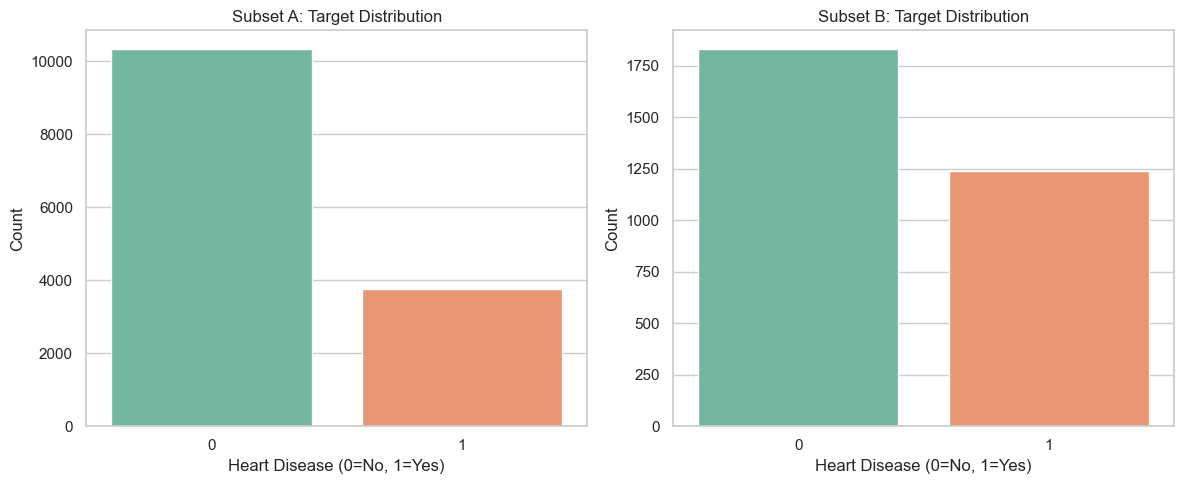

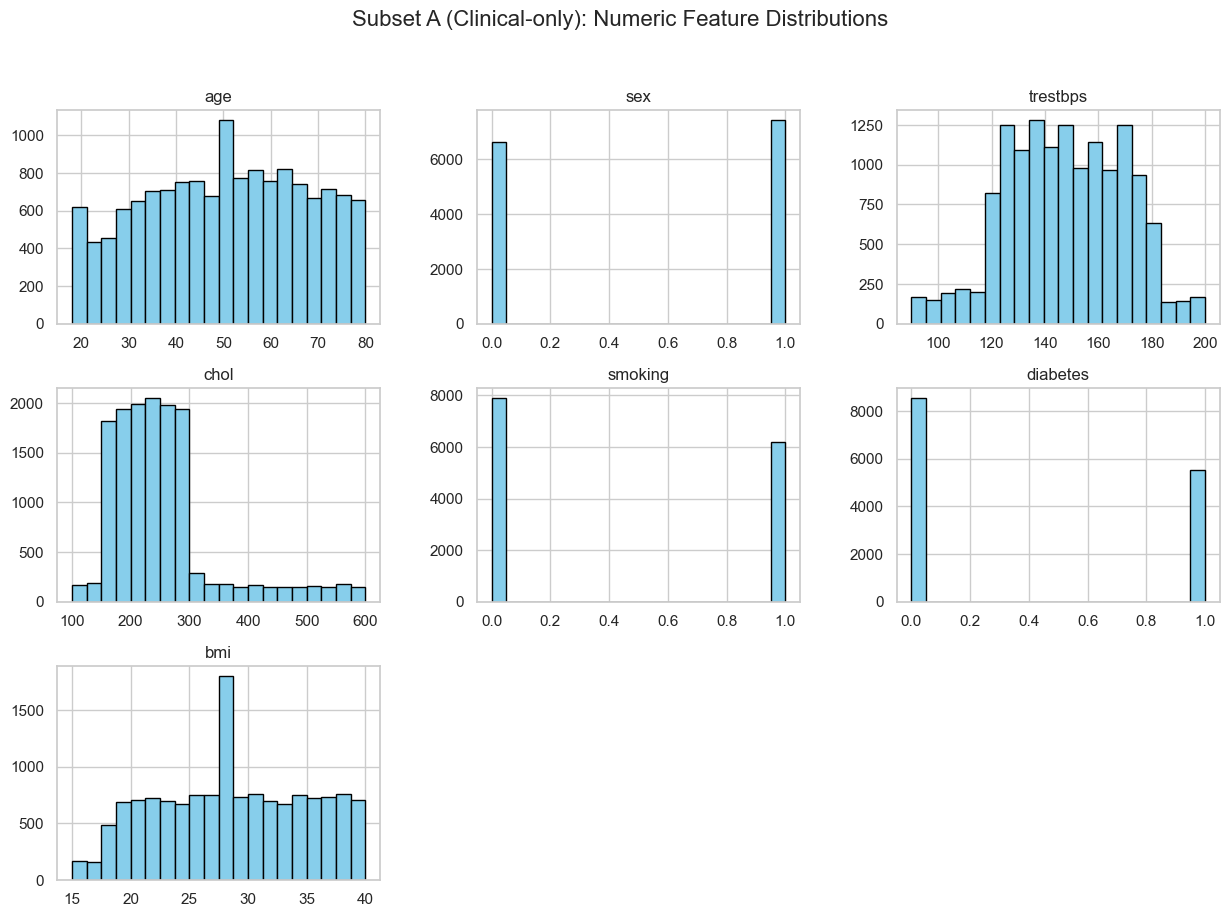

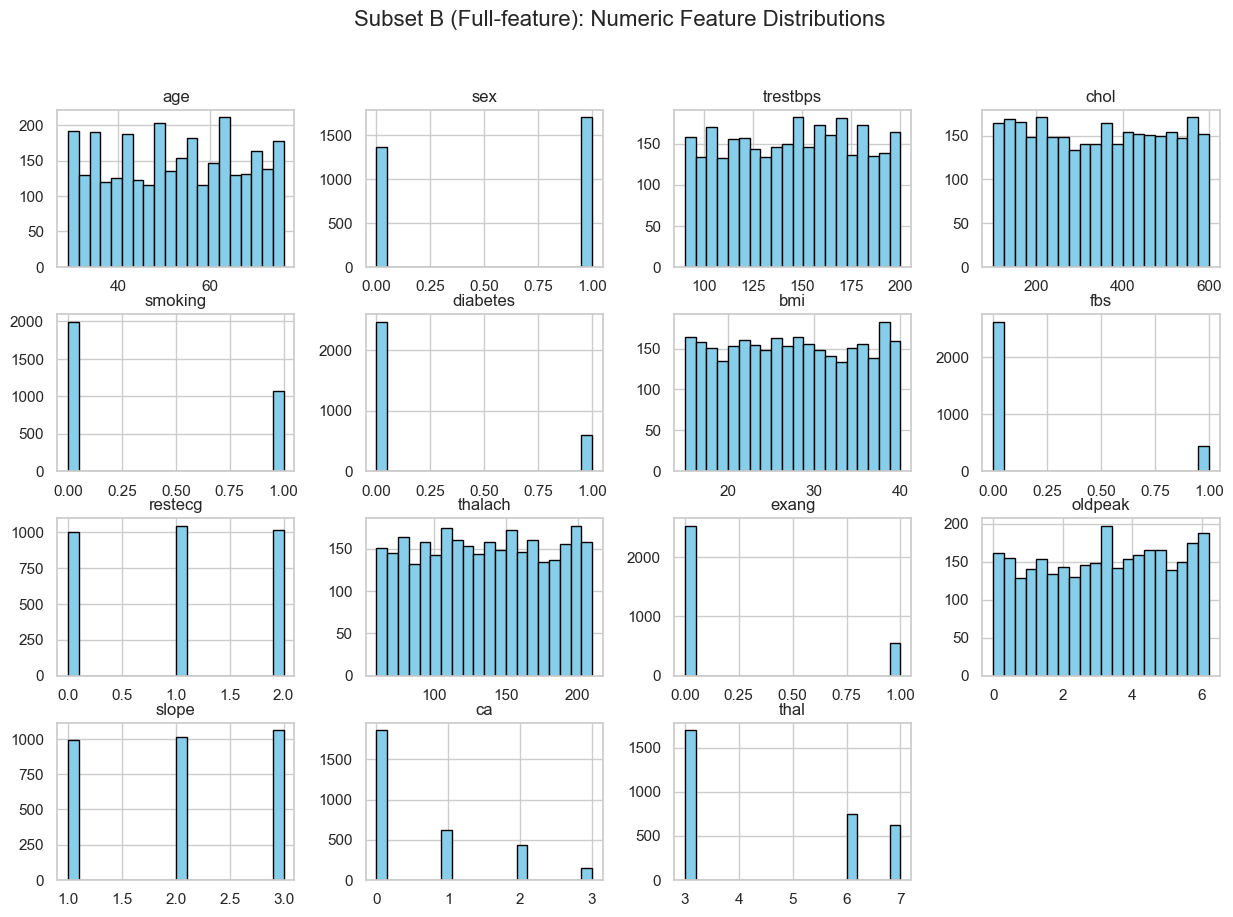

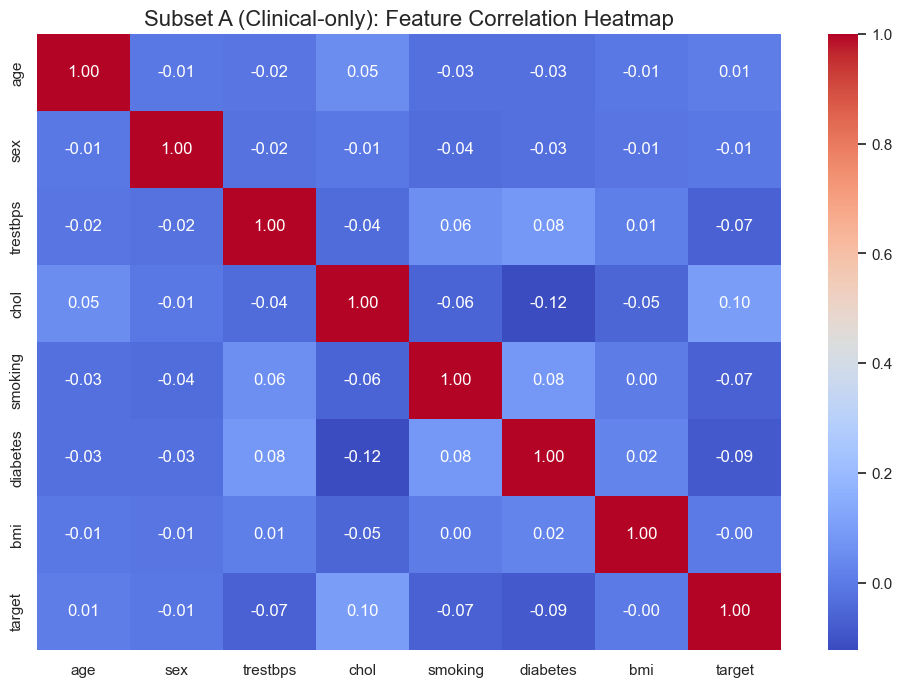

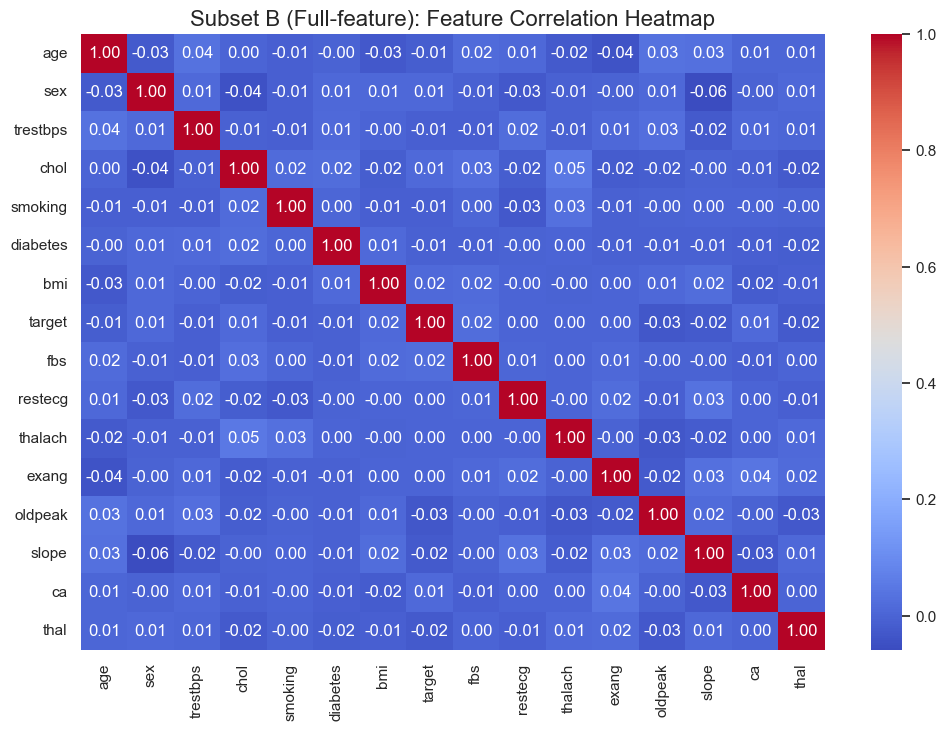

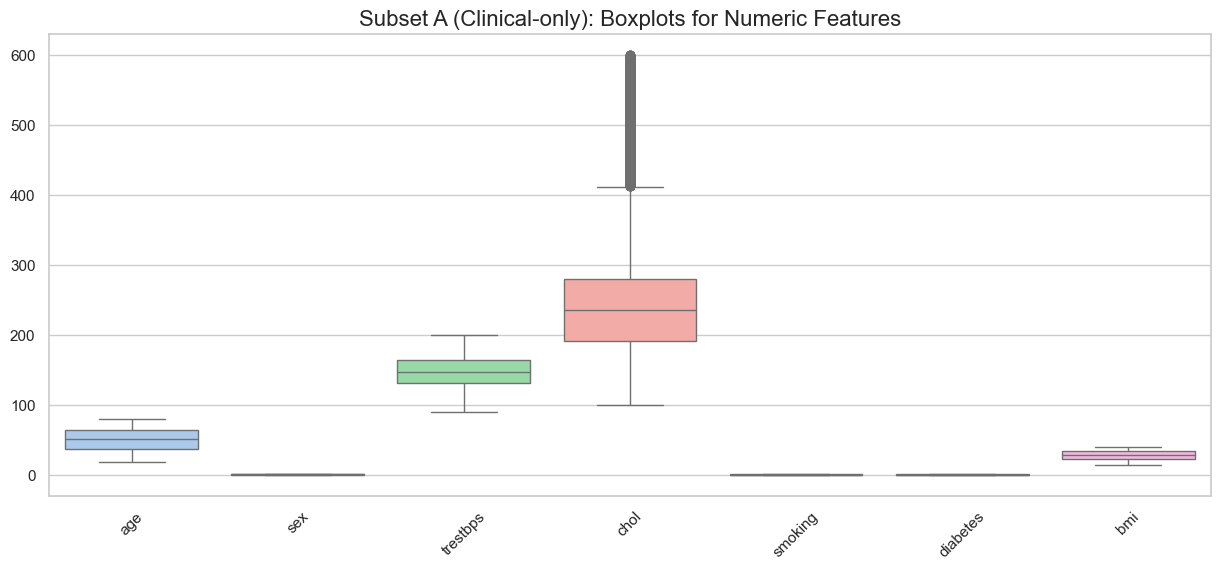

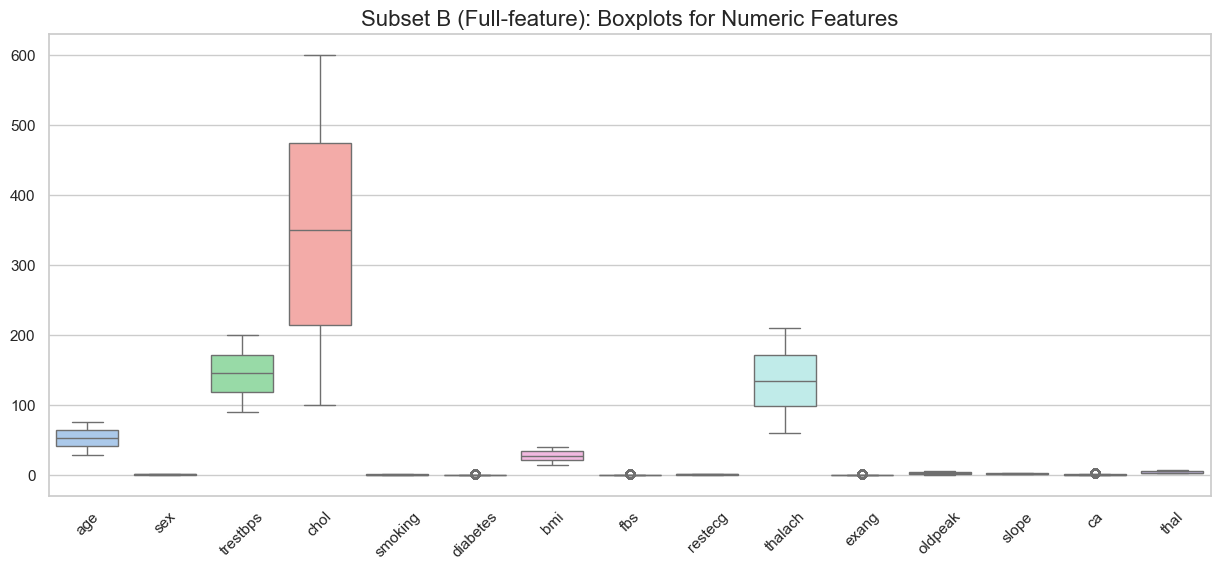

In [13]:
# Exploratory Data Analysis (EDA) for Subset A and Subset B

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# 1️ Target Distribution
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Subset A
sns.countplot(x='target', data=subset_A, palette='Set2', ax=axes[0])
axes[0].set_title("Subset A: Target Distribution")
axes[0].set_xlabel("Heart Disease (0=No, 1=Yes)")
axes[0].set_ylabel("Count")

# Subset B
sns.countplot(x='target', data=subset_B, palette='Set2', ax=axes[1])
axes[1].set_title("Subset B: Target Distribution")
axes[1].set_xlabel("Heart Disease (0=No, 1=Yes)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# 2️ Numeric Feature Distributions
def plot_numeric_distributions(df, subset_name):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('target')
    df[numeric_cols].hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
    plt.suptitle(f"{subset_name}: Numeric Feature Distributions", fontsize=16)
    plt.show()

plot_numeric_distributions(subset_A, "Subset A (Clinical-only)")
plot_numeric_distributions(subset_B, "Subset B (Full-feature)")

# 3️ Correlation Heatmaps
def plot_correlation_heatmap(df, subset_name):
    corr = df.corr()
    plt.figure(figsize=(12,8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"{subset_name}: Feature Correlation Heatmap", fontsize=16)
    plt.show()

plot_correlation_heatmap(subset_A, "Subset A (Clinical-only)")
plot_correlation_heatmap(subset_B, "Subset B (Full-feature)")

# 4️ Boxplots for Outlier Detection
def plot_boxplots(df, subset_name):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('target')
    plt.figure(figsize=(15,6))
    sns.boxplot(data=df[numeric_cols], palette='pastel')
    plt.xticks(rotation=45)
    plt.title(f"{subset_name}: Boxplots for Numeric Features", fontsize=16)
    plt.show()

plot_boxplots(subset_A, "Subset A (Clinical-only)")
plot_boxplots(subset_B, "Subset B (Full-feature)")



========== Subset A (Clinical-only) ==========

Target distribution:
target
0    73.286505
1    26.713495
Name: proportion, dtype: float64


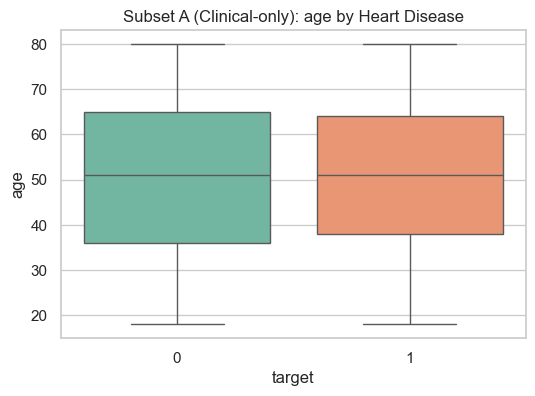

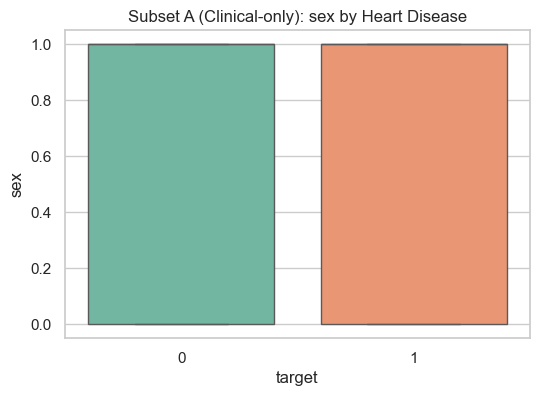

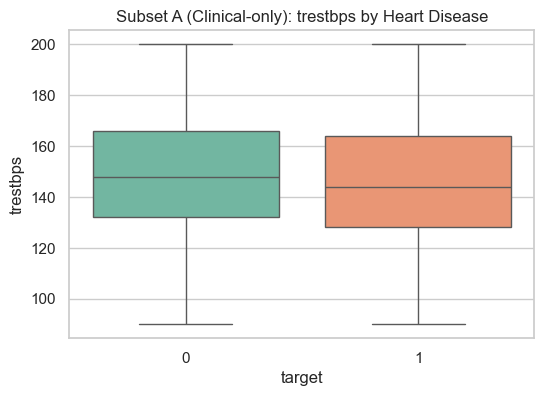

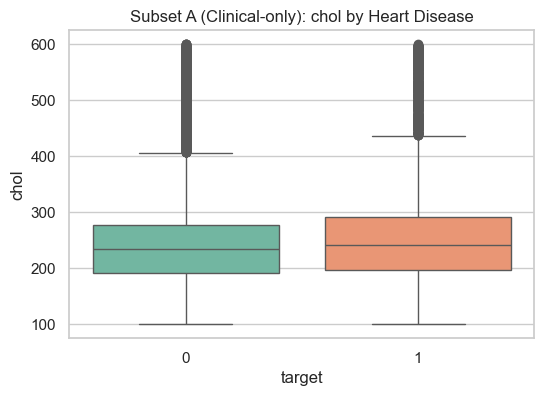

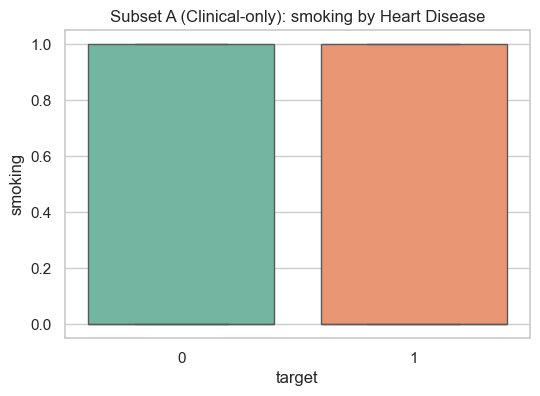

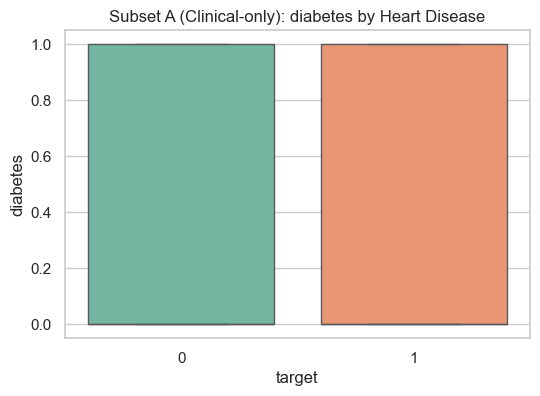

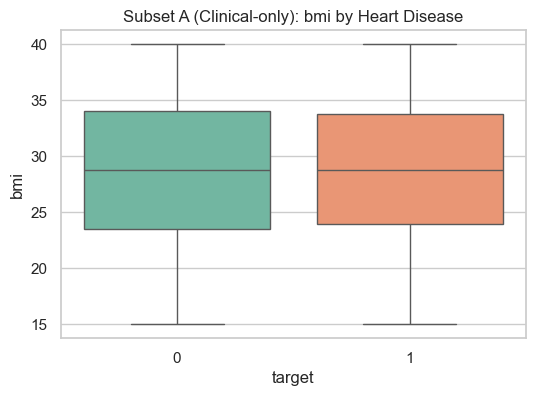

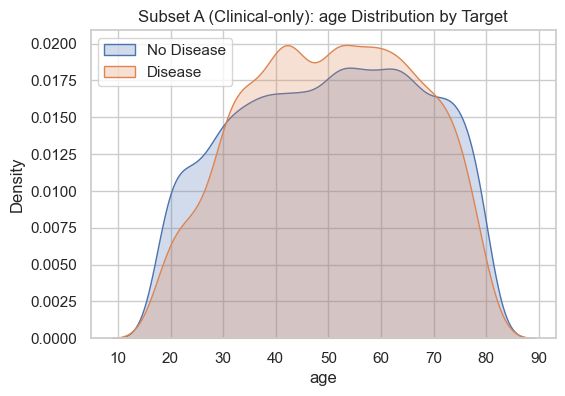

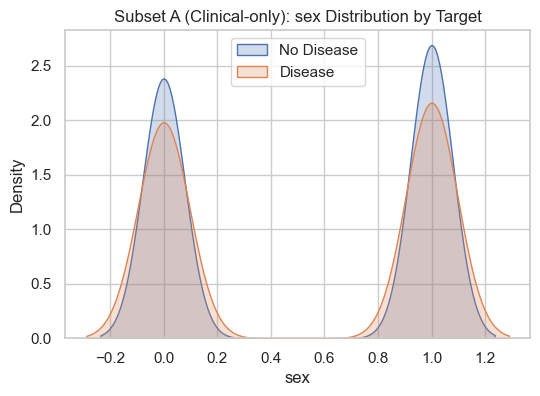

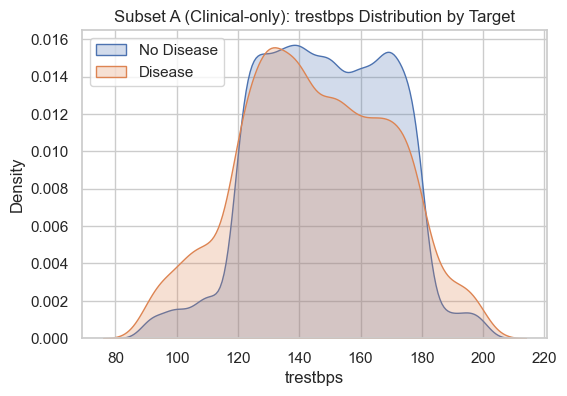

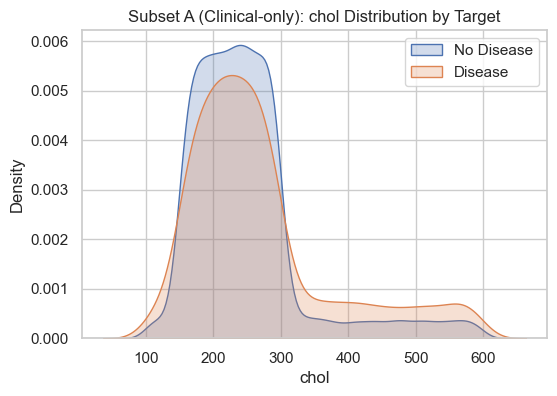

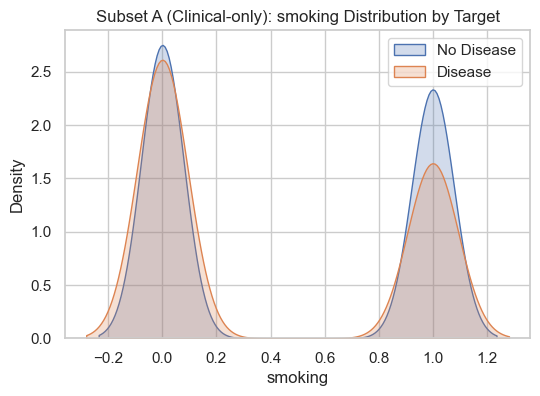

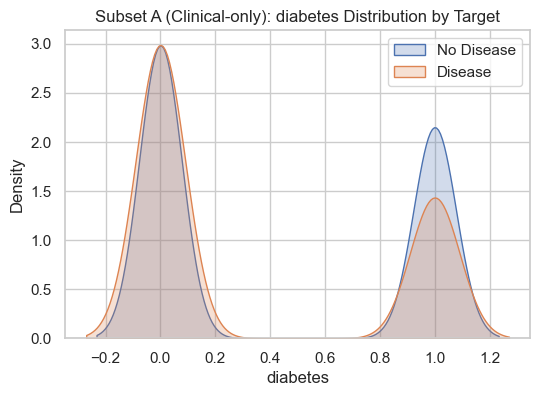

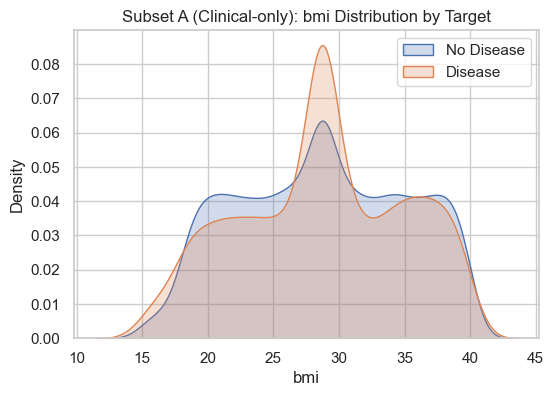


Feature correlation with target:
target      1.000000
chol        0.098350
age         0.005862
bmi        -0.002108
sex        -0.007543
smoking    -0.065146
trestbps   -0.067166
diabetes   -0.085603
Name: target, dtype: float64


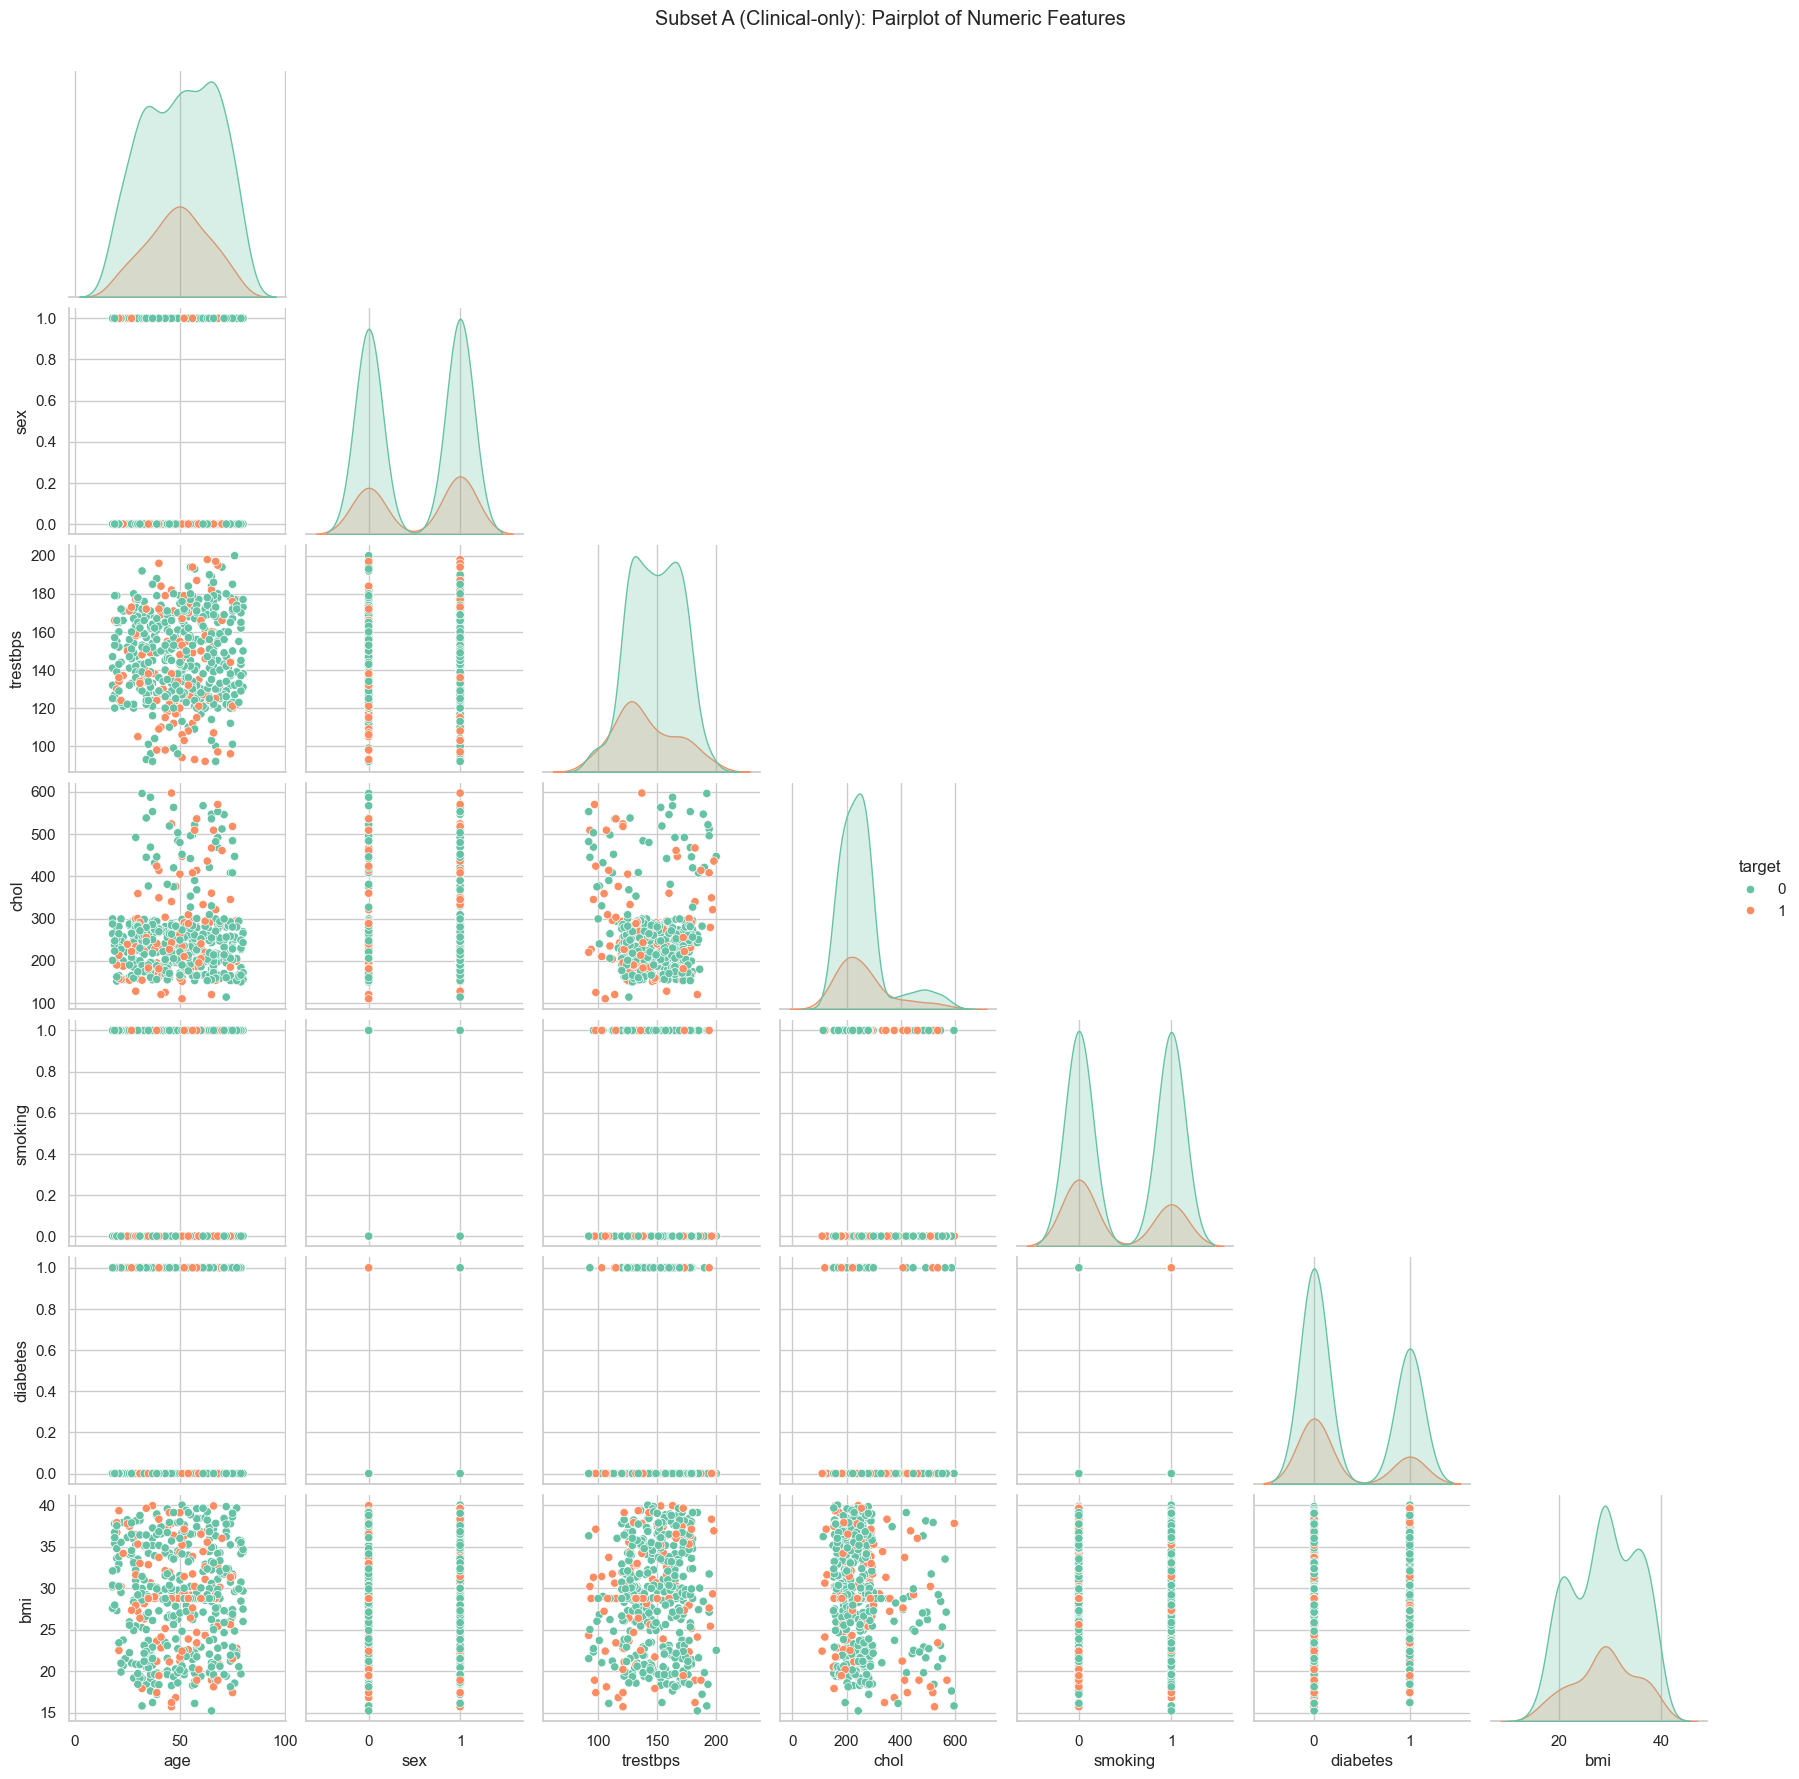


========== Subset B (Full-feature) ==========

Target distribution:
target
0    59.628543
1    40.371457
Name: proportion, dtype: float64


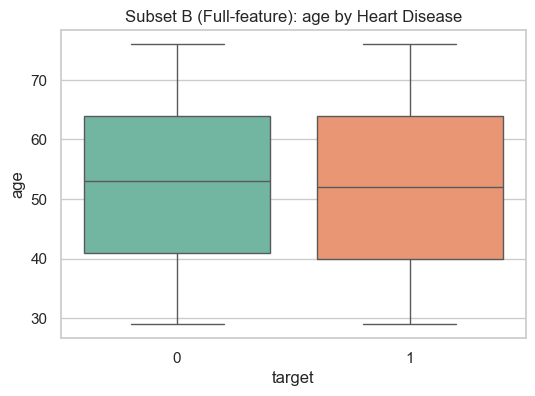

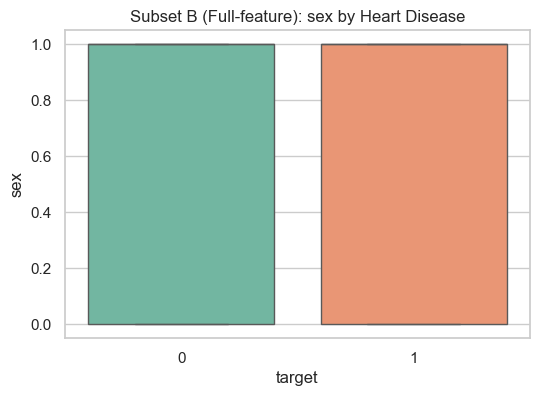

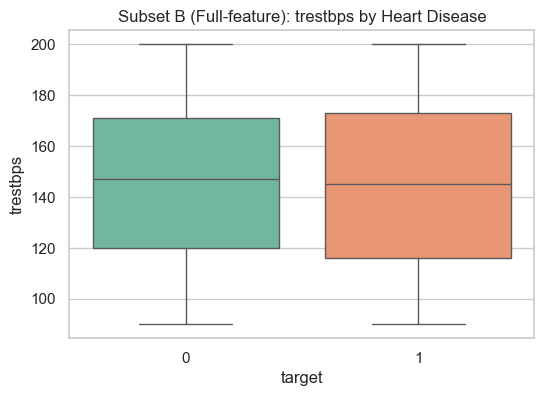

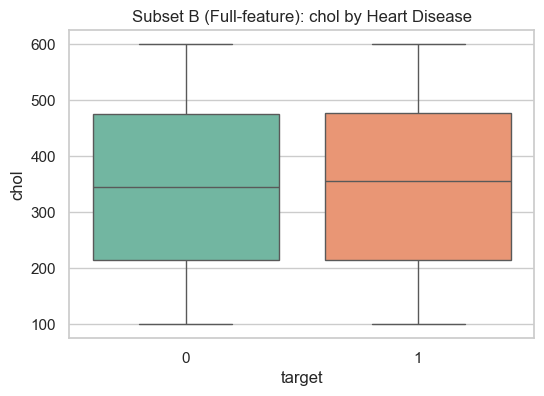

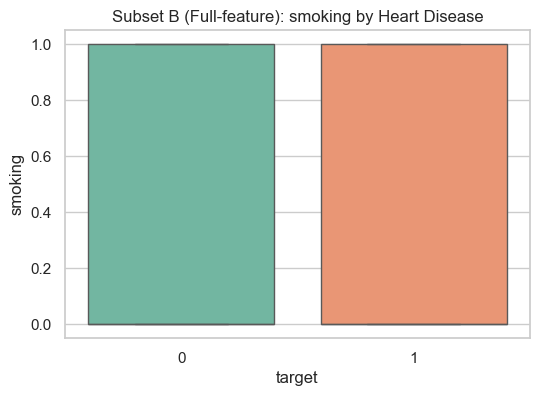

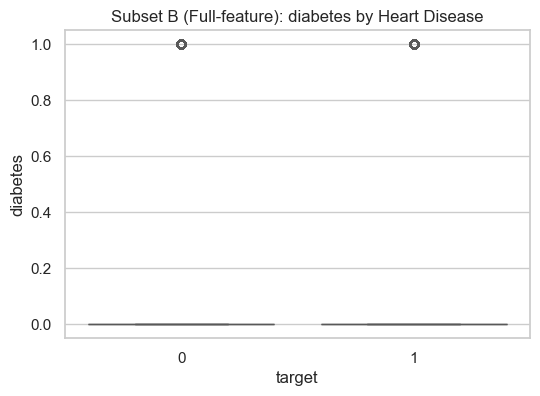

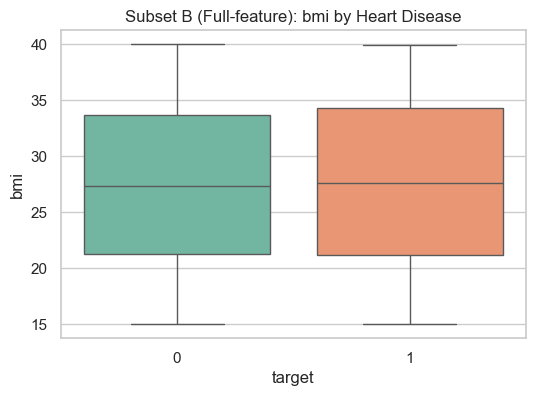

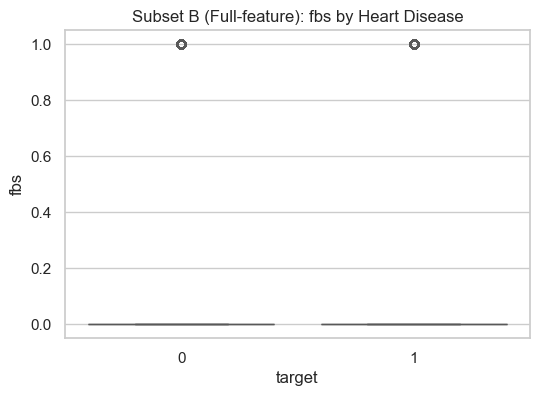

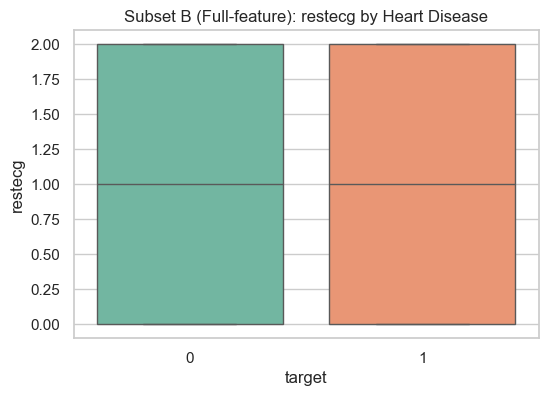

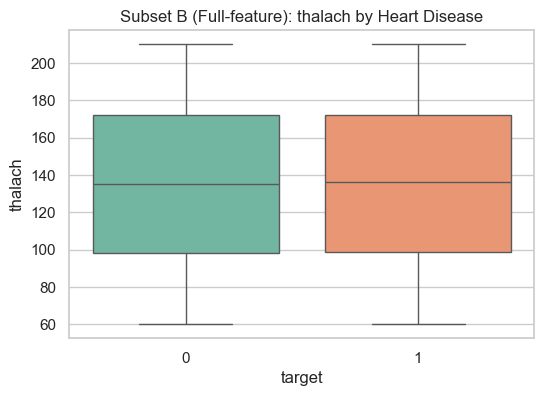

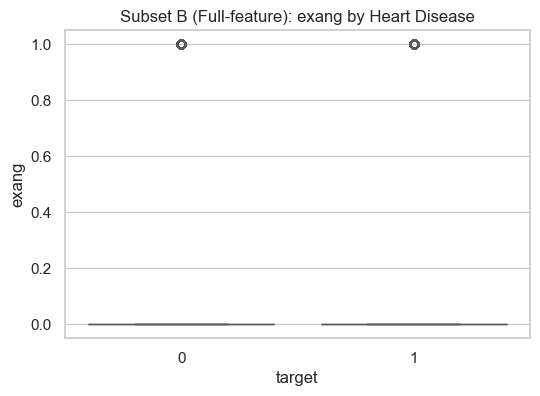

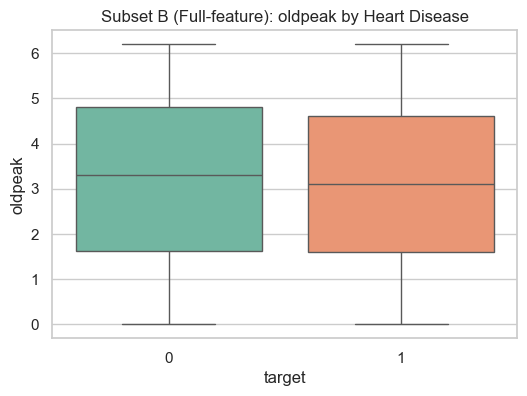

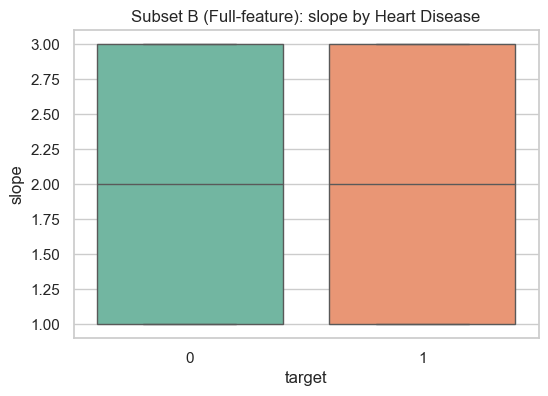

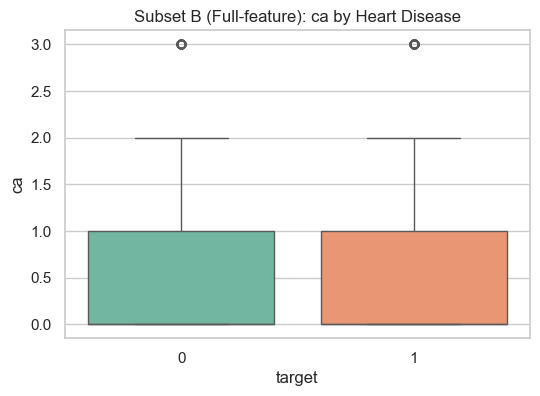

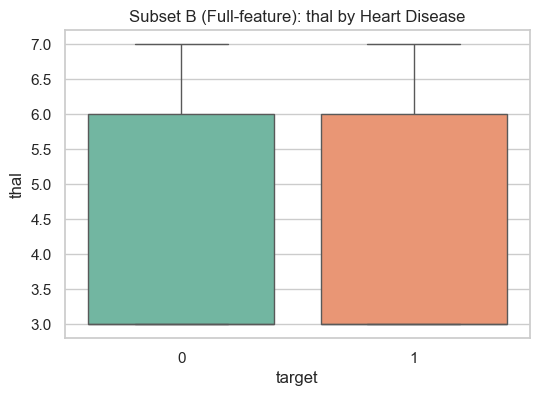

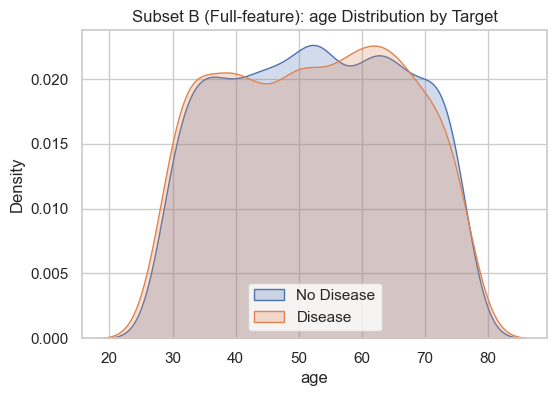

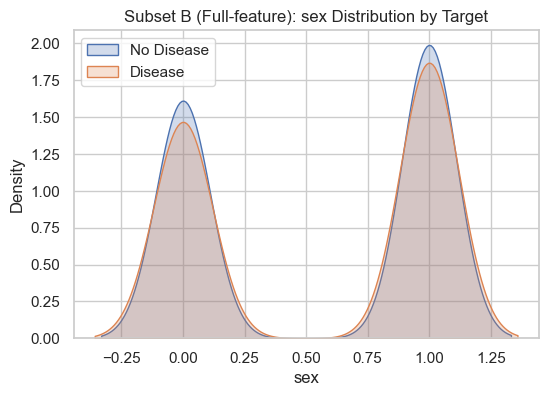

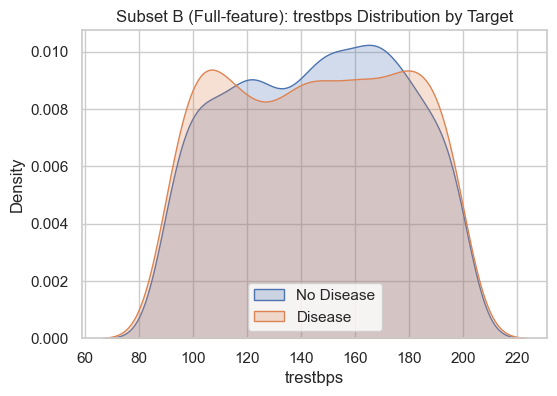

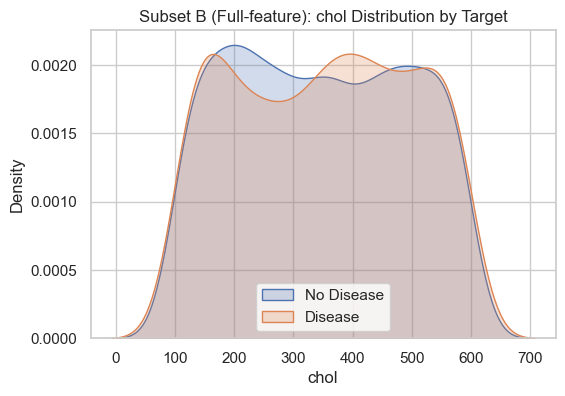

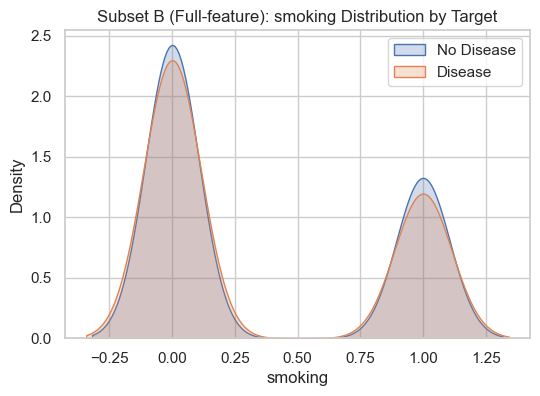

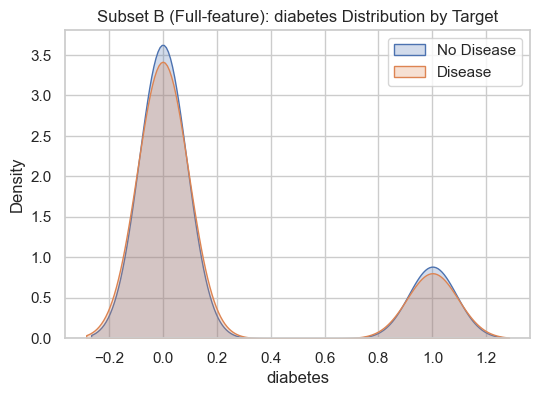

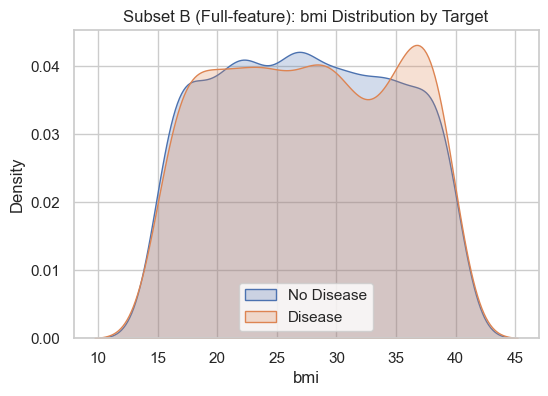

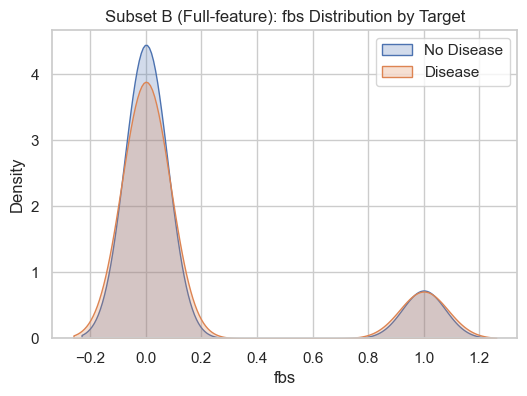

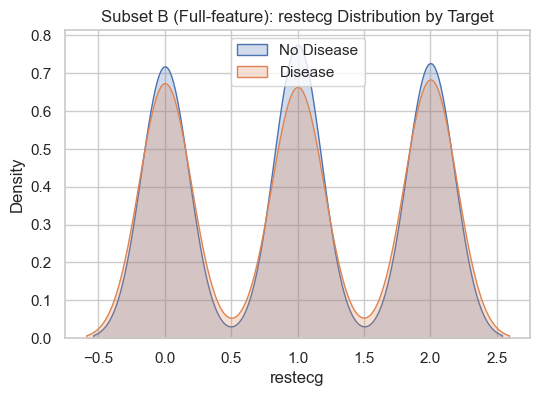

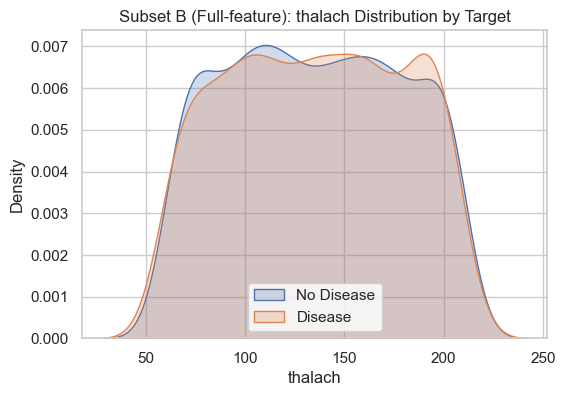

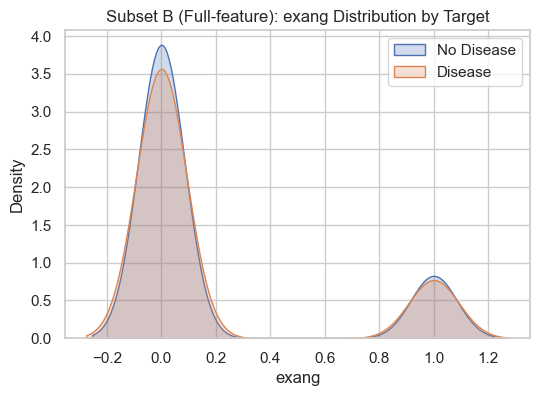

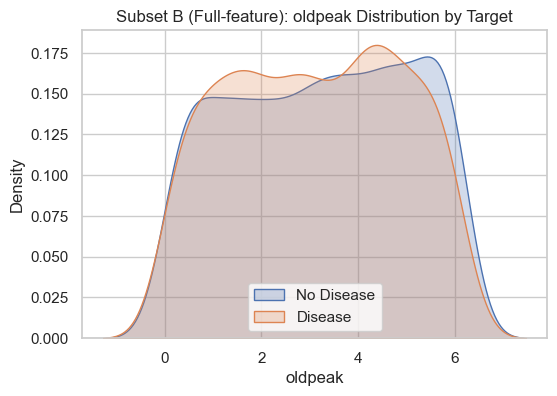

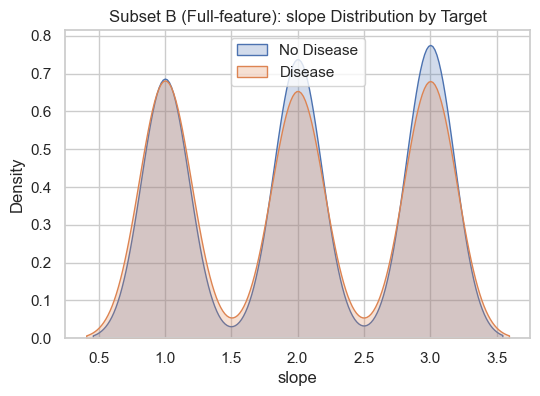

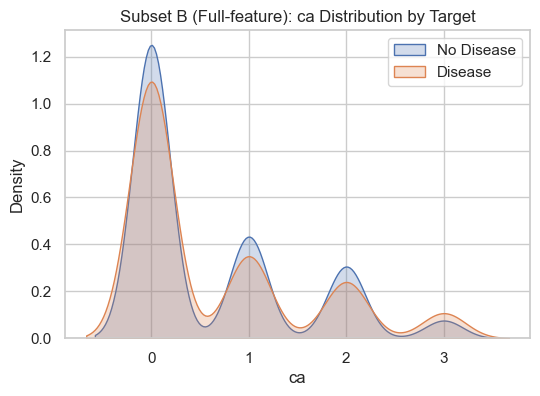

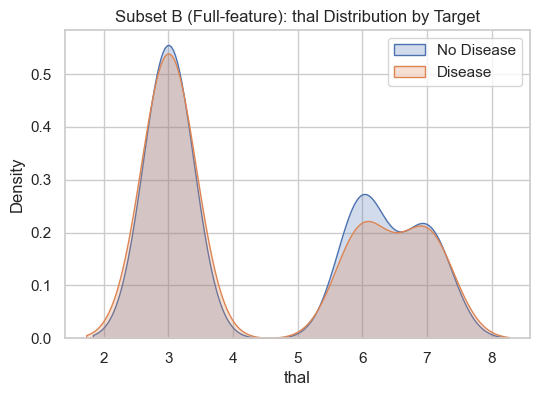


Feature correlation with target:
target      1.000000
fbs         0.019842
bmi         0.015153
ca          0.014646
chol        0.014417
sex         0.007573
exang       0.002772
thalach     0.002237
restecg     0.000615
diabetes   -0.007073
trestbps   -0.011171
smoking    -0.011673
age        -0.013564
thal       -0.023369
slope      -0.024752
oldpeak    -0.033246
Name: target, dtype: float64


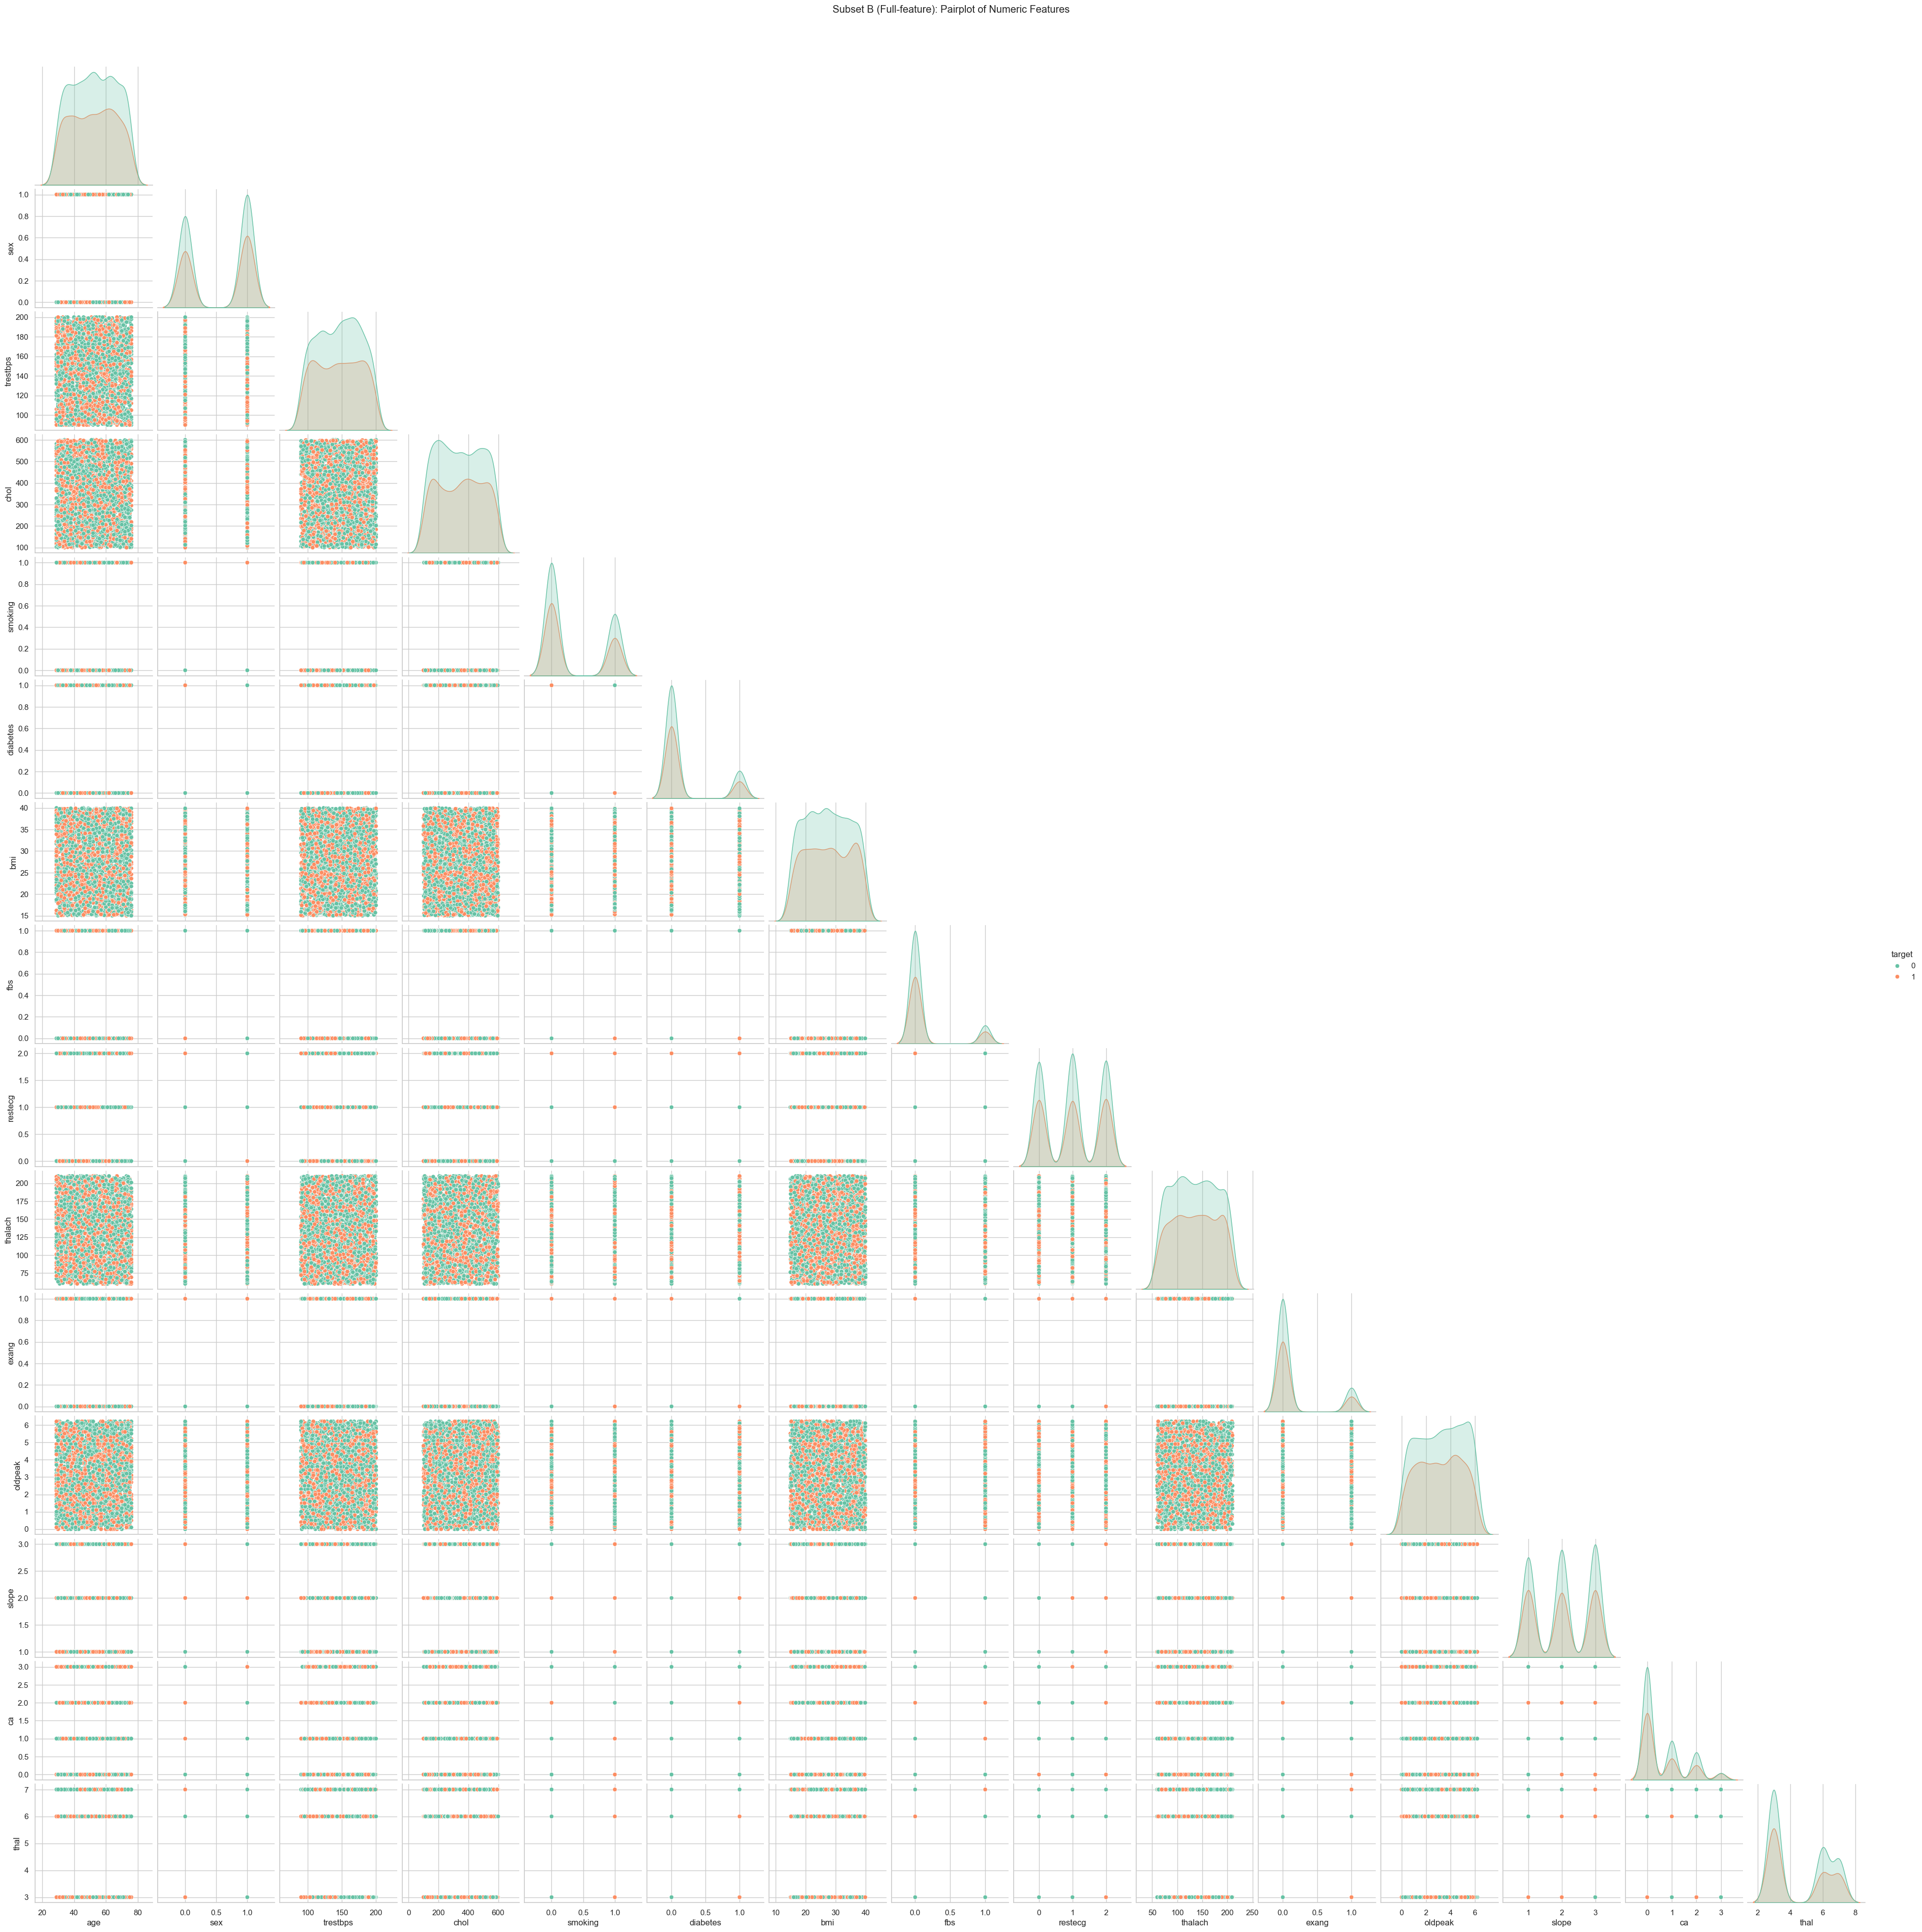

In [14]:
# Comprehensive EDA for Subset A and Subset B

# Libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

def comprehensive_eda(df, subset_name):
    print(f"\n========== {subset_name} ==========\n")
    
    # 1️ Target distribution
    print("Target distribution:")
    print(df['target'].value_counts(normalize=True) * 100)
    
    # 2️ Numeric features: Boxplots by target
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('target')
    for col in numeric_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x='target', y=col, data=df, palette='Set2')
        plt.title(f"{subset_name}: {col} by Heart Disease")
        plt.show()
    
    # 3️ Numeric features: KDE distributions by target
    for col in numeric_cols:
        plt.figure(figsize=(6,4))
        sns.kdeplot(df[df['target']==0][col], label='No Disease', shade=True)
        sns.kdeplot(df[df['target']==1][col], label='Disease', shade=True)
        plt.title(f"{subset_name}: {col} Distribution by Target")
        plt.xlabel(col)
        plt.legend()
        plt.show()
    
    # 4️ Correlation with target
    corr = df.corr()['target'].sort_values(ascending=False)
    print("\nFeature correlation with target:")
    print(corr)
    
    # 5️ Categorical features: Countplots by target
    categorical_cols = [c for c in df.columns if c not in numeric_cols and c != 'target']
    for col in categorical_cols:
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, hue='target', data=df, palette='Set1')
        plt.title(f"{subset_name}: {col} by Target")
        plt.show()
    
    # 6️ Pairplot for numeric features (sample if large)
    if len(df) > 5000:
        df_sample = df.sample(500, random_state=42)
    else:
        df_sample = df.copy()
    sns.pairplot(df_sample, vars=numeric_cols, hue='target', palette='Set2', corner=True)
    plt.suptitle(f"{subset_name}: Pairplot of Numeric Features", y=1.02)
    plt.show()

# Run comprehensive EDA on Subset A
comprehensive_eda(subset_A, "Subset A (Clinical-only)")

# Run comprehensive EDA on Subset B
comprehensive_eda(subset_B, "Subset B (Full-feature)")


In [21]:
# Feature Engineering & Preprocessing

from sklearn.preprocessing import StandardScaler

def preprocess_features(df, subset_name, scale_numeric=True):
    df_proc = df.copy()
    
    # 1️ Encode categorical features if needed (already binary for sex, smoking, diabetes)
    # Here we ensure dtype is int
    categorical_cols = ['sex', 'smoking', 'diabetes']
    for col in categorical_cols:
        if col in df_proc.columns:
            df_proc[col] = df_proc[col].astype(int)
    
    # 2️ Feature engineering
    # Cholesterol per BMI ratio
    if 'chol' in df_proc.columns and 'bmi' in df_proc.columns:
        df_proc['chol_bmi_ratio'] = df_proc['chol'] / df_proc['bmi']
    
    # Age groups (bins)
    if 'age' in df_proc.columns:
        df_proc['age_group'] = pd.cut(df_proc['age'], bins=[0,30,40,50,60,70,100], labels=False)
    
    # 3️ Scale numeric features
    numeric_cols = df_proc.select_dtypes(include=['float64', 'int64']).columns.drop('target')
    if scale_numeric:
        scaler = StandardScaler()
        df_proc[numeric_cols] = scaler.fit_transform(df_proc[numeric_cols])
    
    print(f"{subset_name} after feature engineering and scaling:")
    display(df_proc.head())
    
    return df_proc

# Preprocess Subset A
subset_A_proc = preprocess_features(subset_A, "Subset A (Clinical-only)")

# Preprocess Subset B
subset_B_proc = preprocess_features(subset_B, "Subset B (Full-feature)")


Subset A (Clinical-only) after feature engineering and scaling:


age       sex  trestbps      chol   smoking  diabetes       bmi  \
0  0.333973  0.945703  0.252274 -1.055303  1.129348 -0.805605 -0.586803   
1  1.105313 -1.057414 -0.066773  0.348690 -0.885466  1.241303 -0.550458   
2 -0.259366  0.945703 -0.978337 -0.401535 -0.885466 -0.805605  0.181110   
3 -1.090040 -1.057414 -1.160650  0.423712  1.129348 -0.805605 -0.722757   
4  0.571309  0.945703  0.844791 -0.122880  1.129348  1.241303 -1.298107   

   target  chol_bmi_ratio  age_group  
0       0       -0.691910   0.294152  
1       0        0.426758   0.901503  
2       0       -0.467020  -0.313199  
3       0        0.601598  -0.920550  
4       0        0.529839   0.294152

Subset B (Full-feature) after feature engineering and scaling:


age       sex  trestbps      chol   smoking  diabetes       bmi  \
0  1.057903  0.894427 -1.085739  1.285710  1.365850 -0.490409 -0.562711   
1  0.328257  0.894427 -1.149036 -1.636048 -0.732145  2.039113  1.085518   
2 -0.693246  0.894427  0.813165  1.095013  1.365850  2.039113  0.330080   
3  1.349761 -1.118034 -1.750356  1.197172  1.365850 -0.490409 -1.689000   
4 -1.203998  0.894427 -0.832552 -1.472593  1.365850 -0.490409 -1.482971   

   target       fbs   restecg   thalach     exang   oldpeak     slope  \
0       0 -0.412893  1.226487 -1.087926 -0.462605 -1.048005  1.194078   
1       0 -0.412893  1.226487 -0.372753 -0.462605  1.226587 -0.029095   
2       0 -0.412893 -0.005217 -0.511173 -0.462605  0.283463  1.194078   
3       1 -0.412893  1.226487  0.388561 -0.462605  0.838242 -0.029095   
4       1 -0.412893  1.226487 -0.165122 -0.462605  1.503976  1.194078   

         ca      thal  chol_bmi_ratio  age_group  
0  1.540906 -0.882166        1.275857   0.908369  
1 -0.703004 -0.882166       -1.469924   0.203315  
2 -0.703004  1.402532        0.458889  -0.501739  
3  0.418951 -0.882166        2.864205   1.613423  
4  0.418951 -0.882166       -0.804073  -1.206793

In [23]:
from sklearn.model_selection import train_test_split

# Split Subset A (Clinical-only)
X_A = subset_A_proc.drop('target', axis=1)
y_A = subset_A_proc['target']

X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(
    X_A, y_A, test_size=0.2, random_state=42, stratify=y_A
)

# Split Subset B (Full-feature)
X_B = subset_B_proc.drop('target', axis=1)
y_B = subset_B_proc['target']

X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    X_B, y_B, test_size=0.2, random_state=42, stratify=y_B
)

print("Subset A train/test shapes:", X_train_A.shape, X_test_A.shape)
print("Subset B train/test shapes:", X_train_B.shape, X_test_B.shape)


Subset A train/test shapes: (11275, 9) (2819, 9)
Subset B train/test shapes: (2455, 17) (614, 17)


In [24]:
# Baseline ML Models: Logistic Regression, Random Forest, XGBoost

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def run_baseline_models(X_train, X_test, y_train, y_test, subset_name):
    print(f"\n==== Baseline Models: {subset_name} ====\n")
    
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    }
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else y_pred
        
        print(f"--- {name} ---")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\n")

# Run baseline models for Subset A
run_baseline_models(X_train_A, X_test_A, y_train_A, y_test_A, "Subset A (Clinical-only)")

# Run baseline models for Subset B
run_baseline_models(X_train_B, X_test_B, y_train_B, y_test_B, "Subset B (Full-feature)")



==== Baseline Models: Subset A (Clinical-only) ====

--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      2066
           1       0.50      0.01      0.02       753

    accuracy                           0.73      2819
   macro avg       0.62      0.50      0.43      2819
weighted avg       0.67      0.73      0.62      2819

ROC-AUC Score: 0.5929
Confusion Matrix:
[[2060    6]
 [ 747    6]]


--- Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85      2066
           1       0.65      0.20      0.31       753

    accuracy                           0.76      2819
   macro avg       0.71      0.58      0.58      2819
weighted avg       0.74      0.76      0.71      2819

ROC-AUC Score: 0.6566
Confusion Matrix:
[[1984   82]
 [ 600  153]]


--- XGBoost ---
Classification Report:
              preci

In [28]:
# Advanced Modeling: Handling Imbalance, Hyperparameter Tuning, and Ensembles
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# --- 1. Handle Class Imbalance using SMOTE ---
smote = SMOTE(random_state=42)

X_train_A_res, y_train_A_res = smote.fit_resample(X_train_A, y_train_A)
X_train_B_res, y_train_B_res = smote.fit_resample(X_train_B, y_train_B)

print(f"Subset A: Before SMOTE {y_train_A.value_counts().to_dict()}, After SMOTE {pd.Series(y_train_A_res).value_counts().to_dict()}")
print(f"Subset B: Before SMOTE {y_train_B.value_counts().to_dict()}, After SMOTE {pd.Series(y_train_B_res).value_counts().to_dict()}")




Subset A: Before SMOTE {0: 8263, 1: 3012}, After SMOTE {0: 8263, 1: 8263}
Subset B: Before SMOTE {0: 1464, 1: 991}, After SMOTE {1: 1464, 0: 1464}


In [29]:
# --- 2. Define hyperparameter grids for tuning ---
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}



In [30]:
# --- 3. Hyperparameter tuning using GridSearchCV ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_rf_A = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, scoring='roc_auc', cv=cv, n_jobs=-1)
grid_rf_A.fit(X_train_A_res, y_train_A_res)

grid_xgb_A = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_grid_xgb, scoring='roc_auc', cv=cv, n_jobs=-1)
grid_xgb_A.fit(X_train_A_res, y_train_A_res)

print("Best Random Forest params (Subset A):", grid_rf_A.best_params_)
print("Best XGBoost params (Subset A):", grid_xgb_A.best_params_)



Best Random Forest params (Subset A): {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best XGBoost params (Subset A): {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}


In [31]:
# --- 4. Ensemble using Stacking Classifier ---
estimators = [
    ('rf', grid_rf_A.best_estimator_),
    ('xgb', grid_xgb_A.best_estimator_),
    ('lgbm', LGBMClassifier(random_state=42)),
    ('catboost', CatBoostClassifier(verbose=0, random_state=42))
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1
)

stack_model.fit(X_train_A_res, y_train_A_res)

y_pred_stack = stack_model.predict(X_test_A)
y_prob_stack = stack_model.predict_proba(X_test_A)[:,1]

print("=== Stacking Classifier Results: Subset A ===")
print(classification_report(y_test_A, y_pred_stack))
print("ROC-AUC Score:", roc_auc_score(y_test_A, y_prob_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test_A, y_pred_stack))

=== Stacking Classifier Results: Subset A ===
              precision    recall  f1-score   support

           0       0.78      0.88      0.82      2066
           1       0.48      0.32      0.39       753

    accuracy                           0.73      2819
   macro avg       0.63      0.60      0.61      2819
weighted avg       0.70      0.73      0.71      2819

ROC-AUC Score: 0.641441333729297
Confusion Matrix:
 [[1809  257]
 [ 511  242]]


In [32]:
# SMOTE + Hyperparameter Tuning + Stacking for Subset B (Full-feature)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Split features and target
X_B = subset_B.drop("target", axis=1)
y_B = subset_B["target"]

# Train-test split
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    X_B, y_B, test_size=0.2, random_state=42, stratify=y_B
)

# Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_train_B_res, y_train_B_res = smote.fit_resample(X_train_B, y_train_B)

print("Subset B: Before SMOTE", y_train_B.value_counts().to_dict())
print("Subset B: After SMOTE", y_train_B_res.value_counts().to_dict())

# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, scoring='roc_auc', cv=3, n_jobs=-1)
rf_grid.fit(X_train_B_res, y_train_B_res)
print("Best Random Forest params (Subset B):", rf_grid.best_params_)

# Hyperparameter tuning for XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_params, scoring='roc_auc', cv=3, n_jobs=-1)
xgb_grid.fit(X_train_B_res, y_train_B_res)
print("Best XGBoost params (Subset B):", xgb_grid.best_params_)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf_grid.best_estimator_),
        ('xgb', xgb_grid.best_estimator_),
        ('lr', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_jobs=-1
)

# Train stacking classifier
stacking_clf.fit(X_train_B_res, y_train_B_res)

# Predictions
y_pred_B = stacking_clf.predict(X_test_B)
y_prob_B = stacking_clf.predict_proba(X_test_B)[:,1]

# Evaluation
print("=== Stacking Classifier Results: Subset B ===")
print(classification_report(y_test_B, y_pred_B))
print("ROC-AUC Score:", roc_auc_score(y_test_B, y_prob_B))
print("Confusion Matrix:\n", confusion_matrix(y_test_B, y_pred_B))


Subset B: Before SMOTE {0: 1464, 1: 991}
Subset B: After SMOTE {1: 1464, 0: 1464}
Best Random Forest params (Subset B): {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best XGBoost params (Subset B): {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
=== Stacking Classifier Results: Subset B ===
              precision    recall  f1-score   support

           0       0.59      0.72      0.65       366
           1       0.38      0.25      0.30       248

    accuracy                           0.53       614
   macro avg       0.48      0.49      0.47       614
weighted avg       0.50      0.53      0.51       614

ROC-AUC Score: 0.4934888947646747
Confusion Matrix:
 [[264 102]
 [186  62]]


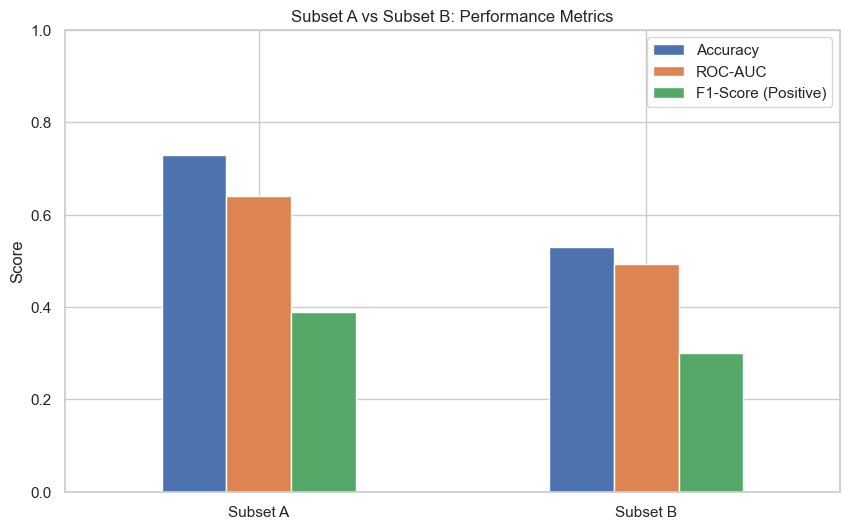

NameError: name 'rf_A' is not defined

In [33]:
# Compare Subset A vs Subset B & Feature Importances
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Metrics for Subset A
metrics_A = {
    "Accuracy": 0.73,
    "ROC-AUC": 0.641,
    "F1-Score (Positive)": 0.39
}

# Metrics for Subset B
metrics_B = {
    "Accuracy": 0.53,
    "ROC-AUC": 0.493,
    "F1-Score (Positive)": 0.30
}

# Combine metrics
metrics_df = pd.DataFrame([metrics_A, metrics_B], index=["Subset A", "Subset B"])

# Plot comparison
metrics_df.plot(kind='bar', figsize=(10,6))
plt.title("Subset A vs Subset B: Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

# Feature Importances from RF and XGBoost
def plot_feature_importances(model, X, title):
    importances = model.feature_importances_
    feat_names = X.columns
    feat_df = pd.DataFrame({"Feature": feat_names, "Importance": importances})
    feat_df = feat_df.sort_values(by="Importance", ascending=False)
    
    plt.figure(figsize=(10,6))
    sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")
    plt.title(title)
    plt.show()

# Assuming you have trained models: rf_A, xgb_A, rf_B, xgb_B
# Plot for Subset A
plot_feature_importances(rf_A, X_train_A, "Random Forest Feature Importances - Subset A")
plot_feature_importances(xgb_A, X_train_A, "XGBoost Feature Importances - Subset A")

# Plot for Subset B
plot_feature_importances(rf_B, X_train_B, "Random Forest Feature Importances - Subset B")
plot_feature_importances(xgb_B, X_train_B, "XGBoost Feature Importances - Subset B")


In [34]:
# Subset A - train best Random Forest and XGBoost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf_A = RandomForestClassifier(
    n_estimators=300, 
    max_depth=None, 
    min_samples_split=2, 
    class_weight='balanced', 
    random_state=42
)
rf_A.fit(X_train_A, y_train_A)

xgb_A = XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.2,
    colsample_bytree=1,
    subsample=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_A.fit(X_train_A, y_train_A)

# Subset B - train best Random Forest and XGBoost
rf_B = RandomForestClassifier(
    n_estimators=300, 
    max_depth=20, 
    min_samples_split=2, 
    class_weight='balanced', 
    random_state=42
)
rf_B.fit(X_train_B, y_train_B)

xgb_B = XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.1,
    colsample_bytree=1,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_B.fit(X_train_B, y_train_B)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

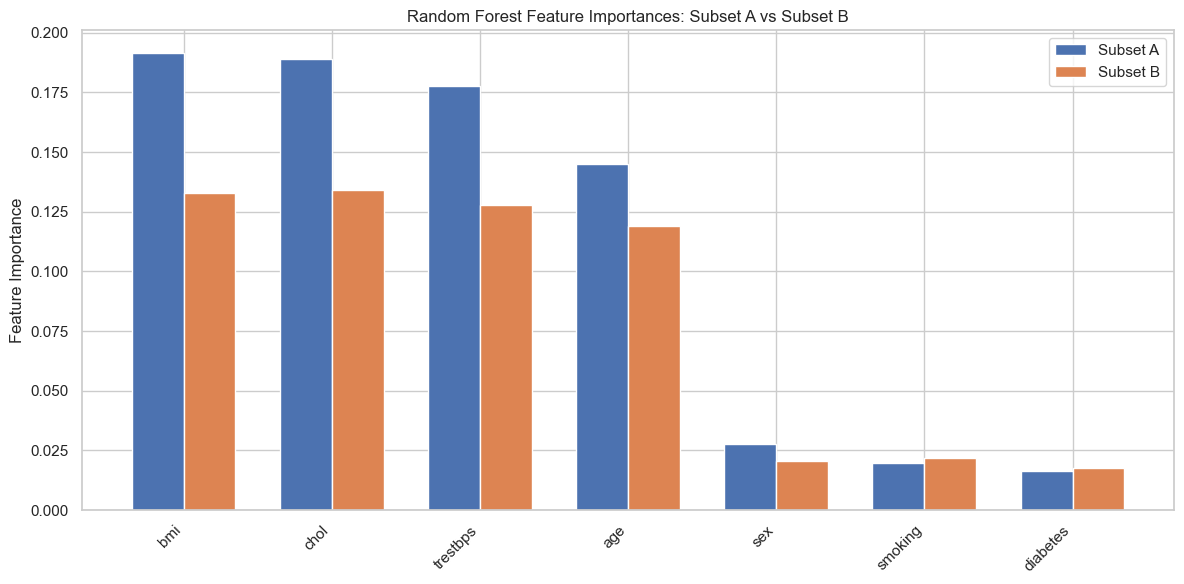

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def get_feature_importances(model, X_train):
    """Return a DataFrame of feature importances."""
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    else:
        raise ValueError("Model does not have feature_importances_ attribute")
    return pd.DataFrame({"feature": X_train.columns, "importance": importances})

# Get feature importances for Random Forest
fi_rf_A = get_feature_importances(rf_A, X_train_A)
fi_rf_B = get_feature_importances(rf_B, X_train_B)

# Merge for comparison
fi_compare = pd.merge(fi_rf_A, fi_rf_B, on="feature", suffixes=("_A", "_B"))

# Sort by Subset A importance for visualization
fi_compare = fi_compare.sort_values(by="importance_A", ascending=False)

# Plot side-by-side bar chart
x = np.arange(len(fi_compare))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, fi_compare["importance_A"], width, label="Subset A")
ax.bar(x + width/2, fi_compare["importance_B"], width, label="Subset B")

ax.set_xticks(x)
ax.set_xticklabels(fi_compare["feature"], rotation=45, ha="right")
ax.set_ylabel("Feature Importance")
ax.set_title("Random Forest Feature Importances: Subset A vs Subset B")
ax.legend()
plt.tight_layout()
plt.show()


In [37]:
import joblib

# Save the best models
joblib.dump(rf_A, "rf_model_subset_A.pkl")
joblib.dump(xgb_B, "xgb_model_subset_B.pkl")

# Prediction function
def predict_heart_disease(model, input_df):
    """
    model: trained model
    input_df: pandas DataFrame with same features as training
    """
    return model.predict(input_df), model.predict_proba(input_df)[:,1]

# Example usage:
# new_data = pd.DataFrame([...])
# preds, probs = predict_heart_disease(rf_A, new_data)


In [38]:
import joblib

# Example: Save models
joblib.dump(rf_A, "rf_model_subset_A.pkl")
joblib.dump(xgb_B, "xgb_model_subset_B.pkl")

# Load models for deployment
rf_model = joblib.load("rf_model_subset_A.pkl")
xgb_model = joblib.load("xgb_model_subset_B.pkl")


In [39]:
def preprocess_input(df):
    # Example: replicate subset A preprocessing
    df['chol_bmi_ratio'] = df['chol'] / df['bmi']
    df['age_group'] = pd.cut(df['age'], bins=[20,35,50,65,80], labels=[0,1,2,3])
    
    # Standardize numeric columns if needed (using training mean/std)
    numeric_cols = ['age','trestbps','chol','bmi','chol_bmi_ratio']
    for col in numeric_cols:
        df[col] = (df[col] - X_train_A[col].mean()) / X_train_A[col].std()
    
    return df


In [45]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# Example training (replace with your data & splits)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_A, y_train_A)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train_B, y_train_B)

scaler_A = StandardScaler().fit(X_train_A)
scaler_B = StandardScaler().fit(X_train_B)

# Save models & scalers
with open("rf_model_subset_A.pkl", "wb") as f:
    pickle.dump(rf_model, f)

with open("xgb_model_subset_B.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

with open("scaler_subset_A.pkl", "wb") as f:
    pickle.dump(scaler_A, f)

with open("scaler_subset_B.pkl", "wb") as f:
    pickle.dump(scaler_B, f)

# Save feature lists
with open("features_subset_A.pkl", "wb") as f:
    pickle.dump(X_train_A.columns.tolist(), f)

with open("features_subset_B.pkl", "wb") as f:
    pickle.dump(X_train_B.columns.tolist(), f)


In [43]:
feature_names_A = X_train_A.columns.tolist()
feature_names_B = X_train_B.columns.tolist()

with open("features_subset_A.pkl", "wb") as f:
    pickle.dump(feature_names_A, f)
with open("features_subset_B.pkl", "wb") as f:
    pickle.dump(feature_names_B, f)


In [47]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 1. Load dataset
df = pd.read_csv("heart.csv")

# 2. Define fixed feature subsets
features_A = ["age", "sex", "cp", "trestbps", "chol", "thalach", "exang", "oldpeak", "ca"]  # 9 features
features_B = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
              "thalach", "exang", "oldpeak", "slope", "ca", "thal", 
              "bmi", "diabetes"]  # 15 features

# 3. Target variable
y = df["target"]

# --- Subset A (Random Forest) ---
X_A = df[features_A]

scaler_A = StandardScaler().fit(X_A)
X_A_scaled = scaler_A.transform(X_A)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_A_scaled, y)

# Save model & scaler
pickle.dump(rf_model, open("rf_model_subset_A.pkl", "wb"))
pickle.dump(scaler_A, open("scaler_subset_A.pkl", "wb"))

# --- Subset B (XGBoost) ---
X_B = df[features_B]

scaler_B = StandardScaler().fit(X_B)
X_B_scaled = scaler_B.transform(X_B)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_B_scaled, y)

# Save model & scaler
pickle.dump(xgb_model, open("xgb_model_subset_B.pkl", "wb"))
pickle.dump(scaler_B, open("scaler_subset_B.pkl", "wb"))

print(" Models and scalers saved successfully!")


KeyError: "['bmi', 'diabetes'] not in index"

In [44]:
from sklearn.preprocessing import StandardScaler
import pickle

# For Subset A
scaler_A = StandardScaler()
scaler_A.fit(X_train_A)  # X_train_A is the training data used for Subset A

with open("scaler_subset_A.pkl", "wb") as f:
    pickle.dump(scaler_A, f)

# For Subset B
scaler_B = StandardScaler()
scaler_B.fit(X_train_B)  # X_train_B is the training data used for Subset B

with open("scaler_subset_B.pkl", "wb") as f:
    pickle.dump(scaler_B, f)
